# Trabajo Práctico Integrador
---

Josselyn Ordoñez - Tatiana Arenas - Jorge Valdez

# 1.- Dataset seleccionado.

*  Datos de distintas canciones en Spotify.

# 2.- Análisis exploratorio de datos (EDA)

* Visualizar las primeras filas. 
* Realizar un resumen de 5 números. 
* Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si 
es informativa para un problema de clasificación (por ejemplo si se trata de un código, como 
una matrícula, o un nombre propio). 
* Identificar las variables de entrada y de salida del problema. 
* Variables de entrada: 
    - Realizar los siguientes análisis por tipo de variable: 
        - Numéricas: Obtener conclusiones acerca de la distribución de los datos. 
        - Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada 
categoría, etc. 
        - Compuestas: ¿Pueden tratarse para utilizarse en el problema a resolver? 
* Variables de salida (en caso de aplicar): 
    - ¿Están balanceadas las clases? 
    - (en caso de aplicar) ¿Qué técnicas consideraría para codificar la variable de salida? Justifique.

Info:

https://developer.spotify.com/documentation/web-api/reference/get-audio-features

## Cargamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#from scipy.stats import gaussian_kde


In [5]:
DATASET_PATH = "data/"
# Cargamos el dataset
df = pd.read_csv(DATASET_PATH+'data_playlist.csv')
data/data_playlist.csv

FileNotFoundError: [Errno 2] No such file or directory: 'data/data_playlist.csv'

Visualizamos los primeros datos

In [ ]:
# Visualizamos las primeras 5 filas
df.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


## Descripción del dataset
---

1. **acousticness**: Una medida que representa la cantidad de sonido acústico en una canción. Los valores varían de 0.0 a 1.0.

2. **danceability**: Una medida que describe cuánto se presta una canción para bailar, basada en varios factores musicales. Los valores varían de 0.0 a 1.0.

3. **duration**: La duración de la canción en milisegundos.

4. **energy**: Una medida que representa la intensidad y actividad de una canción. Los valores varían de 0.0 a 1.0.

5. **instrumentalness**: Es una medida que predice si una pista es instrumental o no. Los valores varían de 0.0 a 1.0.

6. **key**: La clave tonal predominante de la canción, representada como un valor entero entre 0 y 11 (donde cada número corresponde a una clave musical).

7. **liveness**: Una medida que representa la presencia de una audiencia en la grabación de la canción. Los valores varían de 0.0 a 1.0.

8. **loudness**: El volumen general de la canción en decibelios (dB).

9. **mode**: Indica la modalidad de la canción (mayor o menor), representada como un valor binario (1 = Mayor, 0 = Menor).

10. **speechiness**: Una medida que representa la presencia de palabras habladas en una canción. Los valores varían de 0.0 a 1.0.

11. **tempo**: El tempo general de la canción en latidos por minuto (BPM).

12. **time_signature**: Una indicación general del número de beats en cada barra o compás de la canción.

13. **valence**: Una medida que representa la positividad transmitida por una canción. Los valores varían de 0.0 a 1.0.

14. **label**: indica si la canción le gusta o no a un usuario. 0 = no le gusta, 1 = si le gusta



In [ ]:
# Mostramos la información del dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


In [ ]:
# Supuestos de variables independientes
NUMERICAL_FEATURES = ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
CATEGORICAL_FEATURES = ['key', 'mode', 'time_signature']

# Variable objetivo
TARGET = 'label'

Podemos ver que todas las columnas son leidas como tipo númerico. Luego veremos cuales son categóricas.

In [ ]:
# Veo los valores únicos de la columna "key"
print("Valores únicos de columna 'key'",np.sort(df['key'].unique()))
# Veo los valores únicos de la columna "mode"
print("Valores únicos de columna 'mode'",np.sort(df['mode'].unique()))
# Veo los valores únicos de la columna "time_signature"
print("Valores únicos de columna 'time_signature'",np.sort(df['time_signature'].unique()))


Valores únicos de columna 'key' [ 0  1  2  3  4  5  6  7  8  9 10 11]
Valores únicos de columna 'mode' [0 1]
Valores únicos de columna 'time_signature' [1 3 4 5]


Podemos argumentar que esta tres columnas son categoricas: 'key', 'mode' y 'time_signature'.

## Estadísticas descriptivas de variables númericas

In [ ]:
# Mostramos un resumen estadístico de las columnas numéricas
df[NUMERICAL_FEATURES].describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,750.0,0.357394,0.338405,0.000001,0.03715,0.24450,0.678500,0.994
danceability,750.0,0.596439,0.172036,0.107000,0.48000,0.60600,0.715750,0.986
duration,750.0,220112.733333,65587.690483,33840.000000,185490.25000,215108.50000,244236.750000,675360.000
energy,750.0,0.594188,0.253301,0.009250,0.42325,0.63150,0.804750,0.995
instrumentalness,750.0,0.100245,0.259921,0.000000,0.00000,0.00001,0.002245,0.967
liveness,750.0,0.203376,0.177609,0.024000,0.09455,0.12900,0.264750,0.979
loudness,750.0,-8.509339,5.039488,-29.601000,-10.17350,-7.27000,-5.097750,-0.533
speechiness,750.0,0.098966,0.104715,0.023400,0.03590,0.04875,0.113000,0.721
tempo,750.0,120.405761,28.378116,55.747000,98.99800,120.10450,138.074750,204.162
valence,750.0,0.497321,0.239615,0.033200,0.29700,0.48300,0.684500,0.975


## Estadísticas descriptivas de variables categóricas

In [ ]:
# Mostramos un resumen estadístico de las columnas categóricas
df[CATEGORICAL_FEATURES].describe().T 

,count,mean,std,min,25%,50%,75%,max
key,750.0,4.829333,3.636001,0.0,1.0,5.0,8.0,11.0
mode,750.0,0.741333,0.438194,0.0,0.0,1.0,1.0,1.0
time_signature,750.0,3.902667,0.400091,1.0,4.0,4.0,4.0,5.0


In [ ]:
# Vamos a cambiar de milisegundos a segundos la duración de las canciones
df['duration'] = df['duration']/1000 # Paso la duración a segundos

# Graficamos el histograma de las variables númericas del datset

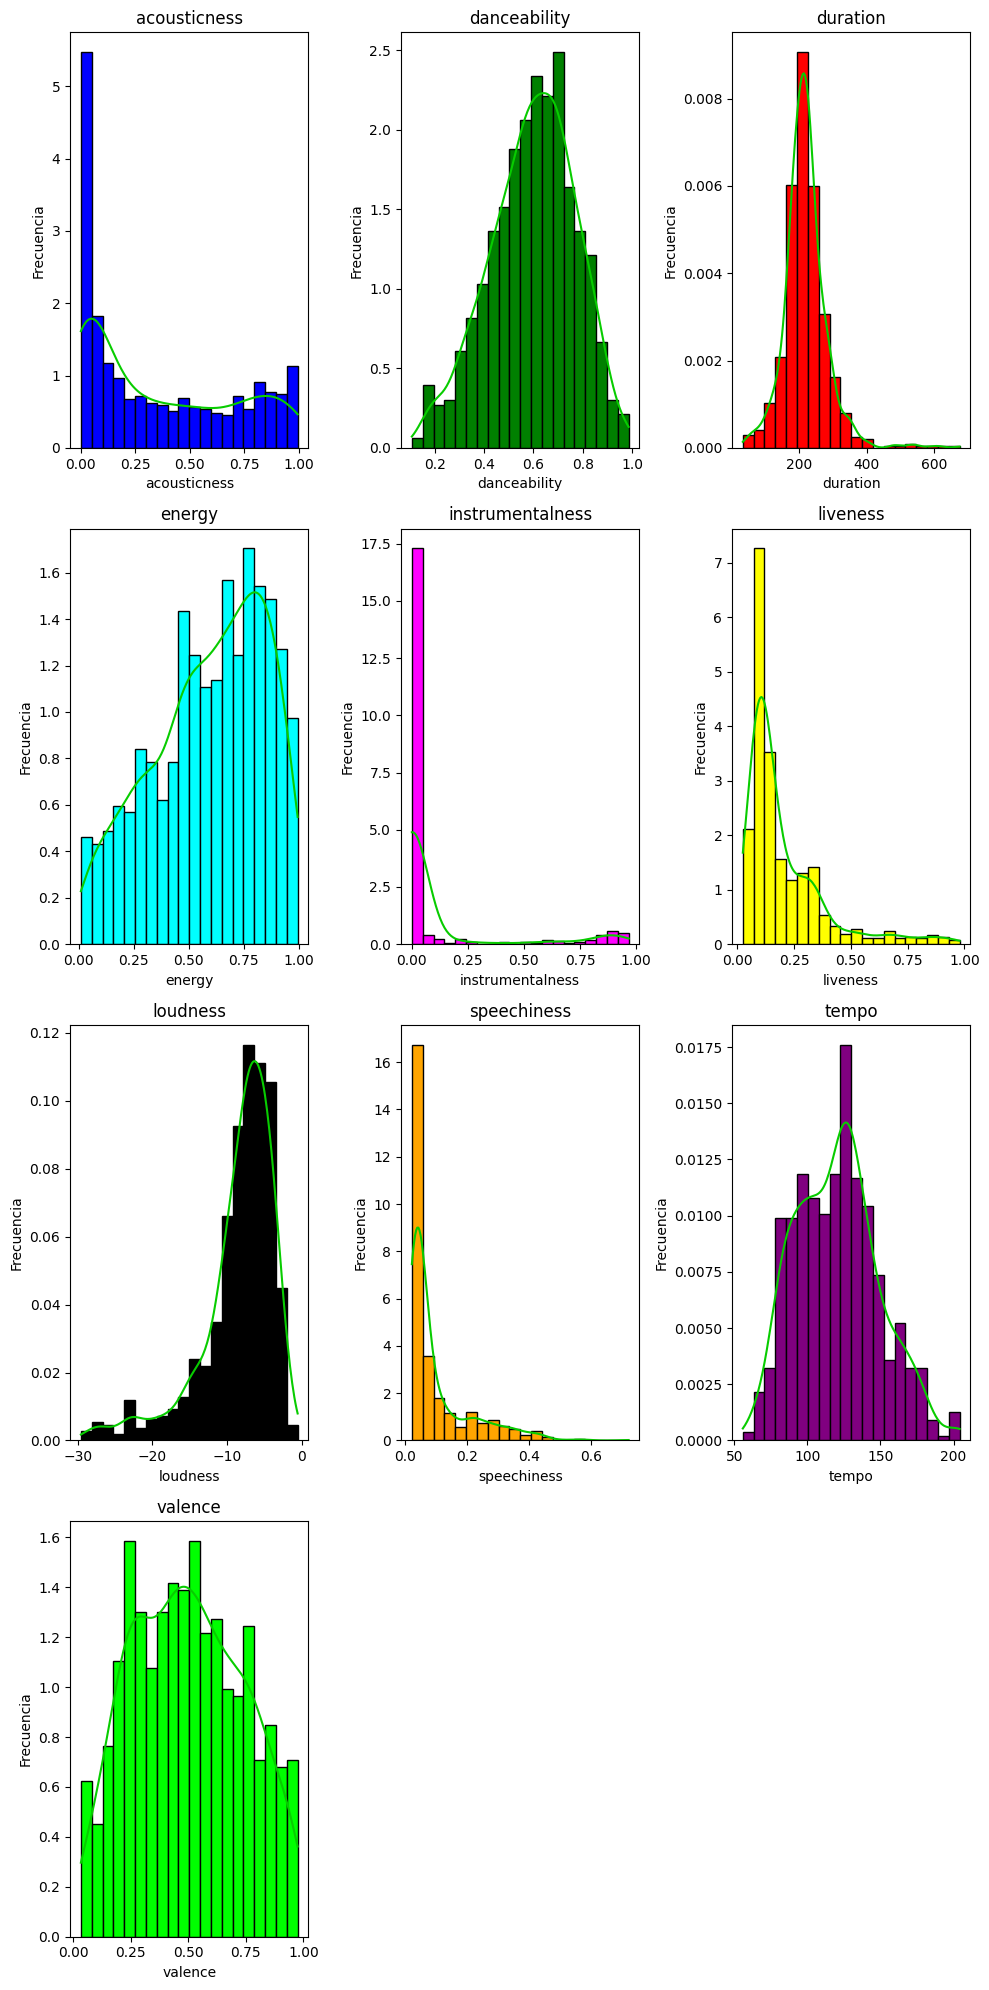

In [ ]:
# Configuración de subplots: 5 filas y 2 columnas
fig, axes = plt.subplots(4, 3, figsize=(10, 20))  # Ajusta el tamaño si es necesario

# Aplanar el arreglo de ejes para facilitar su uso en un bucle
axes = axes.flatten()

# Lista de colores
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 
          'purple', 'lime']

# Número total de columnas en el DataFrame
#num_columns = len(df.columns)
num_columns = len(NUMERICAL_FEATURES)

for i, ax in enumerate(axes):
    if i < num_columns:
        # Crear histograma para cada columna
        ax.hist(df[NUMERICAL_FEATURES].iloc[:, i], bins=20, density=True, color=colors[i], edgecolor='black')  # Usar el color correspondiente
        
        # Crear curva de densidad
        densidad = stats.gaussian_kde(df[NUMERICAL_FEATURES].iloc[:, i])
        xs = np.linspace(min(df[NUMERICAL_FEATURES].iloc[:, i]), max(df[NUMERICAL_FEATURES].iloc[:, i]), 200)
        densidad._compute_covariance()
        ax.plot(xs, densidad(xs), '#08cc00') # Curva verde 

        ax.set_title(df[NUMERICAL_FEATURES].columns[i])
        ax.set_xlabel(df[NUMERICAL_FEATURES].columns[i])
        ax.set_ylabel('Frecuencia')
    else:
        # Ocultar el subgráfico si no hay más datos que graficar
        ax.axis('off')

plt.tight_layout()  # Ajusta automáticamente los subgráficos para que encajen en la figura
plt.show()  # Muestra la figura

>   Mirando las diferentes distribuciones podemos decir:

    - Las canciones de la lista tienen una alta bailabilidad (variable danceability).
    - la mayoría de las canciones no son una grabación en vivo (variable liveness).
    - en la mayoría de las canciones hay pocas palabras habladas (variable speechiness).
    - la duración de las canciones es en su mayoría de entre 3 y 4 minutos. (variable duration)

### Graficamos la dispersion de los datos de a pares

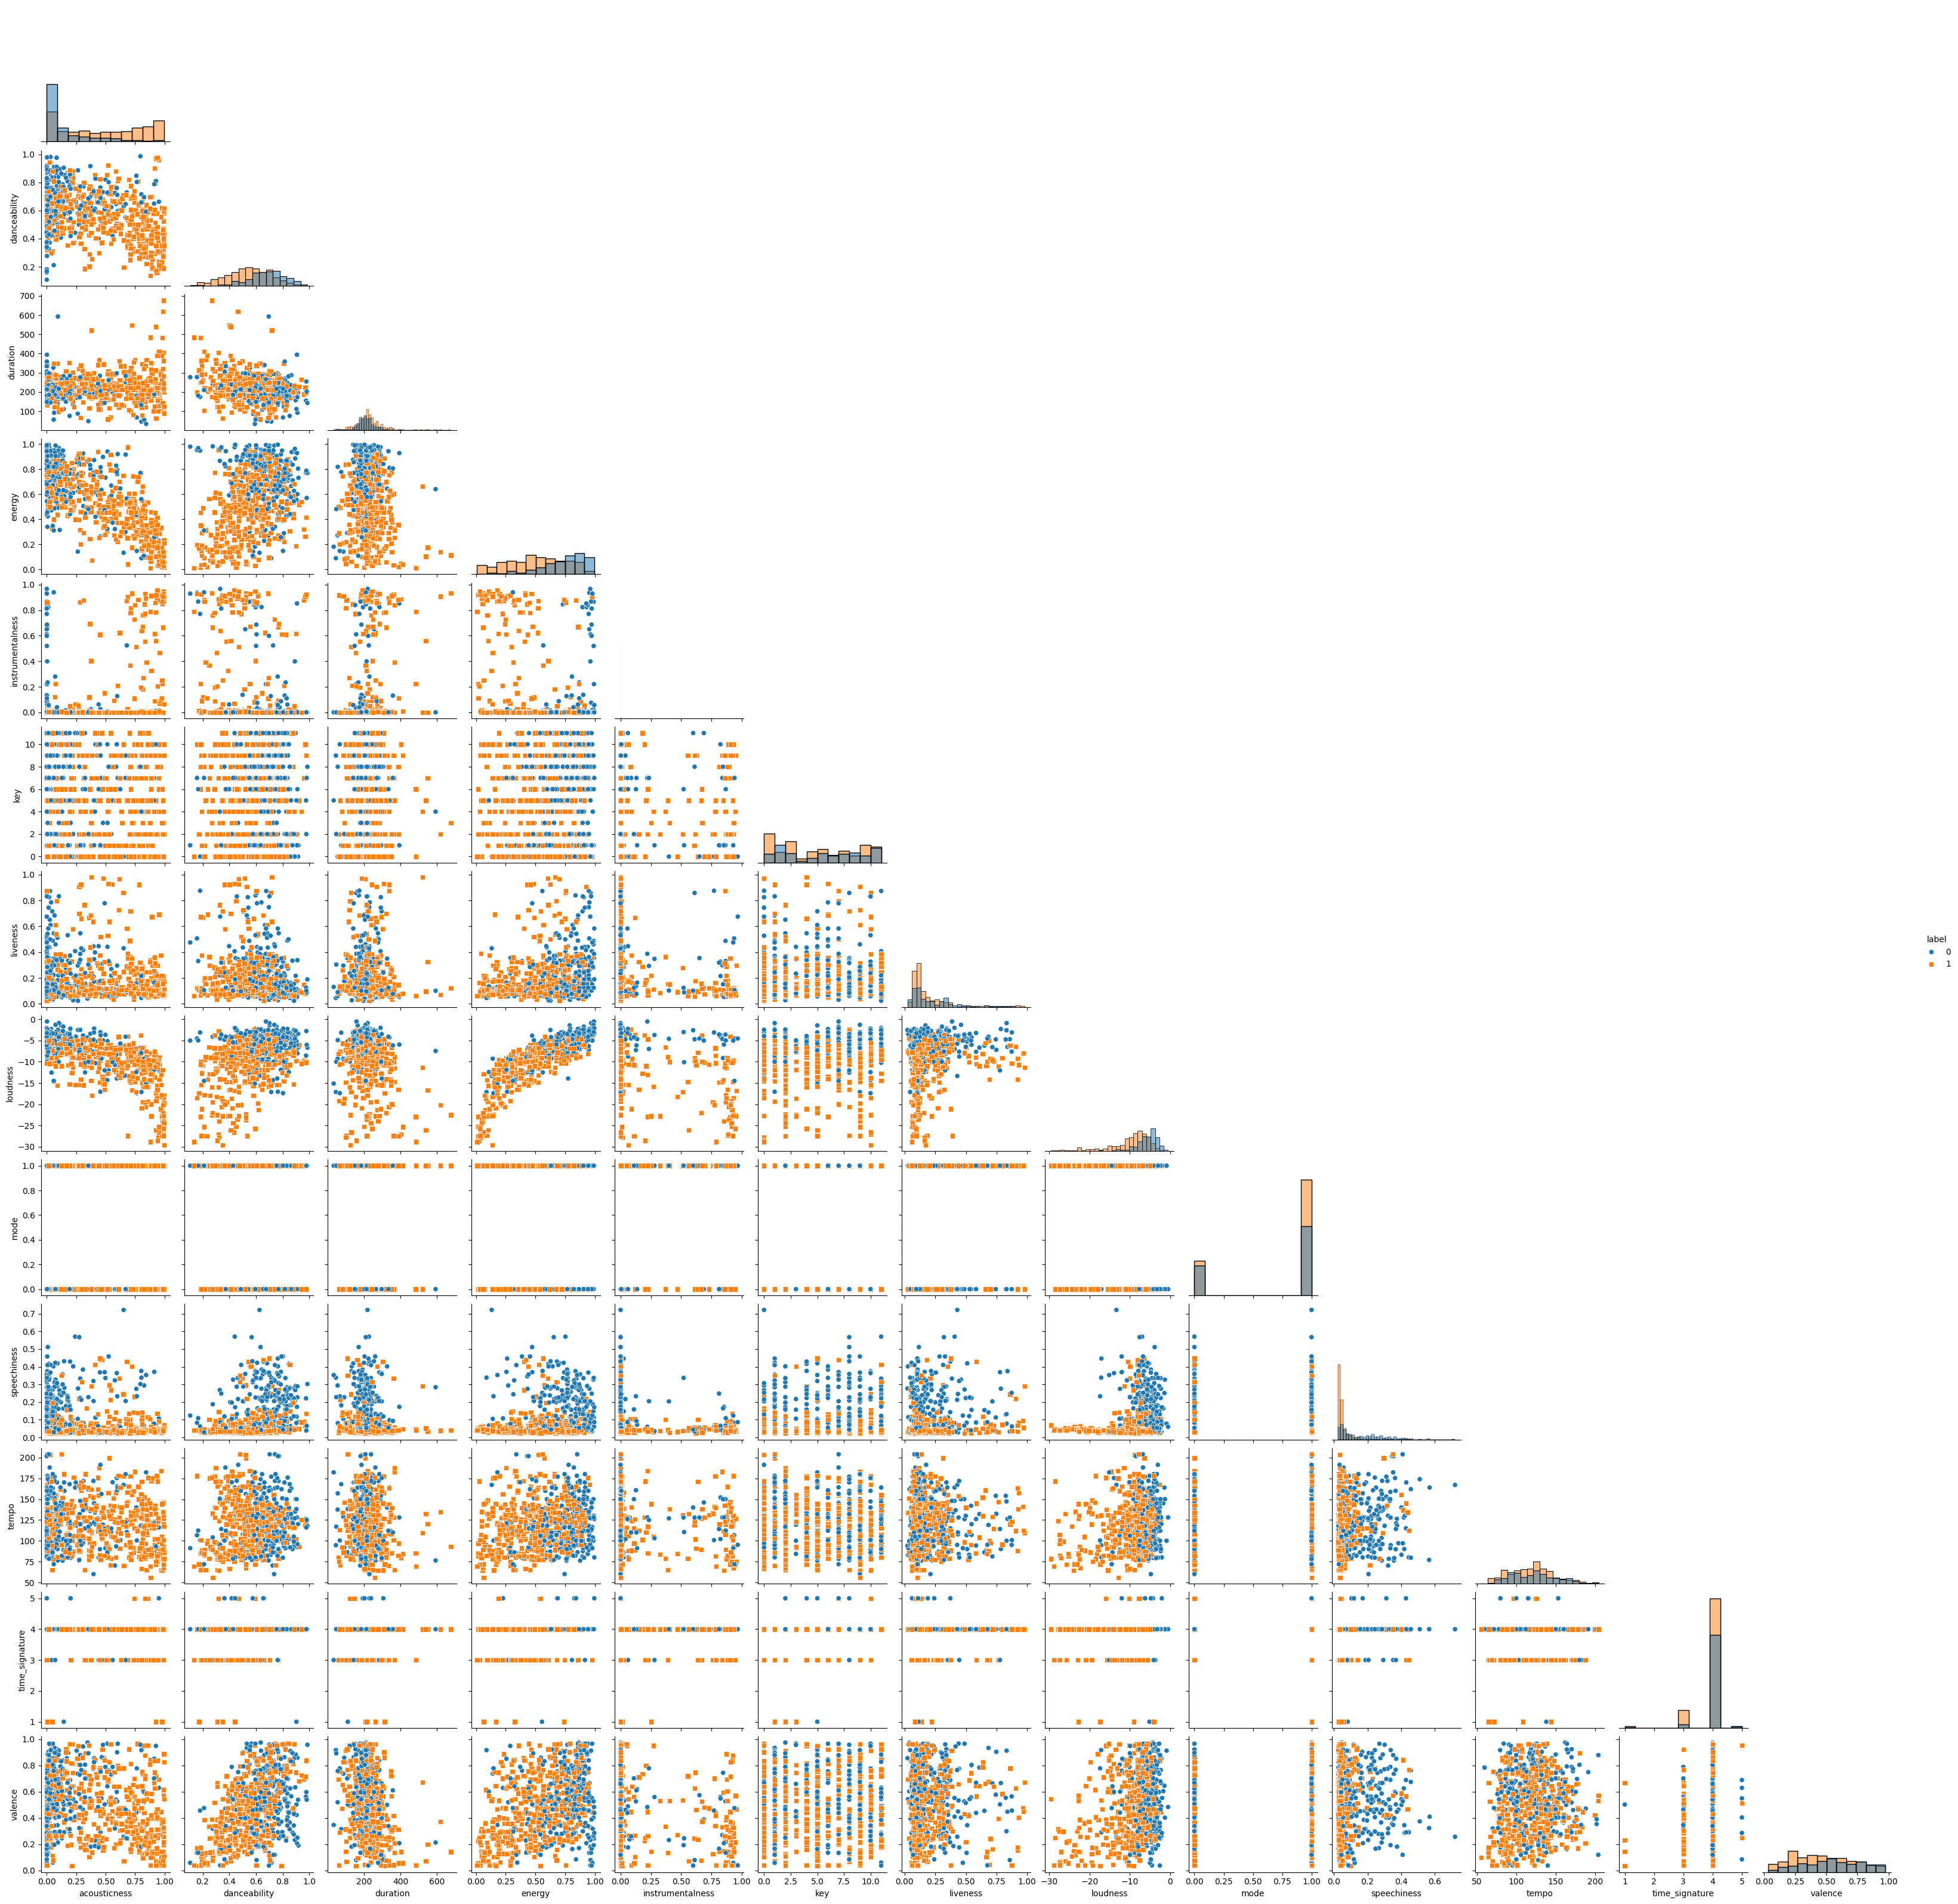

In [ ]:
sns.pairplot(df, hue="label", diag_kind="hist", corner=True, markers=["o", "s"])

Analizamos como estan balanceadas las variables cetgoricas, en especial la variable objetivo 'label'

# Grafico de boxplot

Creamos los diagramas de cajas y bigotes para las variables numericas divididas según la variable objetivo que en este caso es 'label'. Con este podemos observar en general la distribución de dichas variables.

In [ ]:
def plot_label_horizontal_bar(col, title=None, axis = None):
    data = df.groupby('label')[col].mean().sort_values()

    cmap = plt.cm.coolwarm_r
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    colors = [cmap(norm(value)) for value in data]

    valoresLabel = df["label"].unique()

    if axis is None:
        fig, ax = plt.subplots()
    else:
        ax = axis

    data.plot.barh(ax=ax, color=colors)
    ax.set_xlabel(col)
    ax.set_title(title, fontdict={'size': 13, 'color': '#de5d55'})

    # Show the plot if axis is not provided
    if axis is None:
        plt.show()

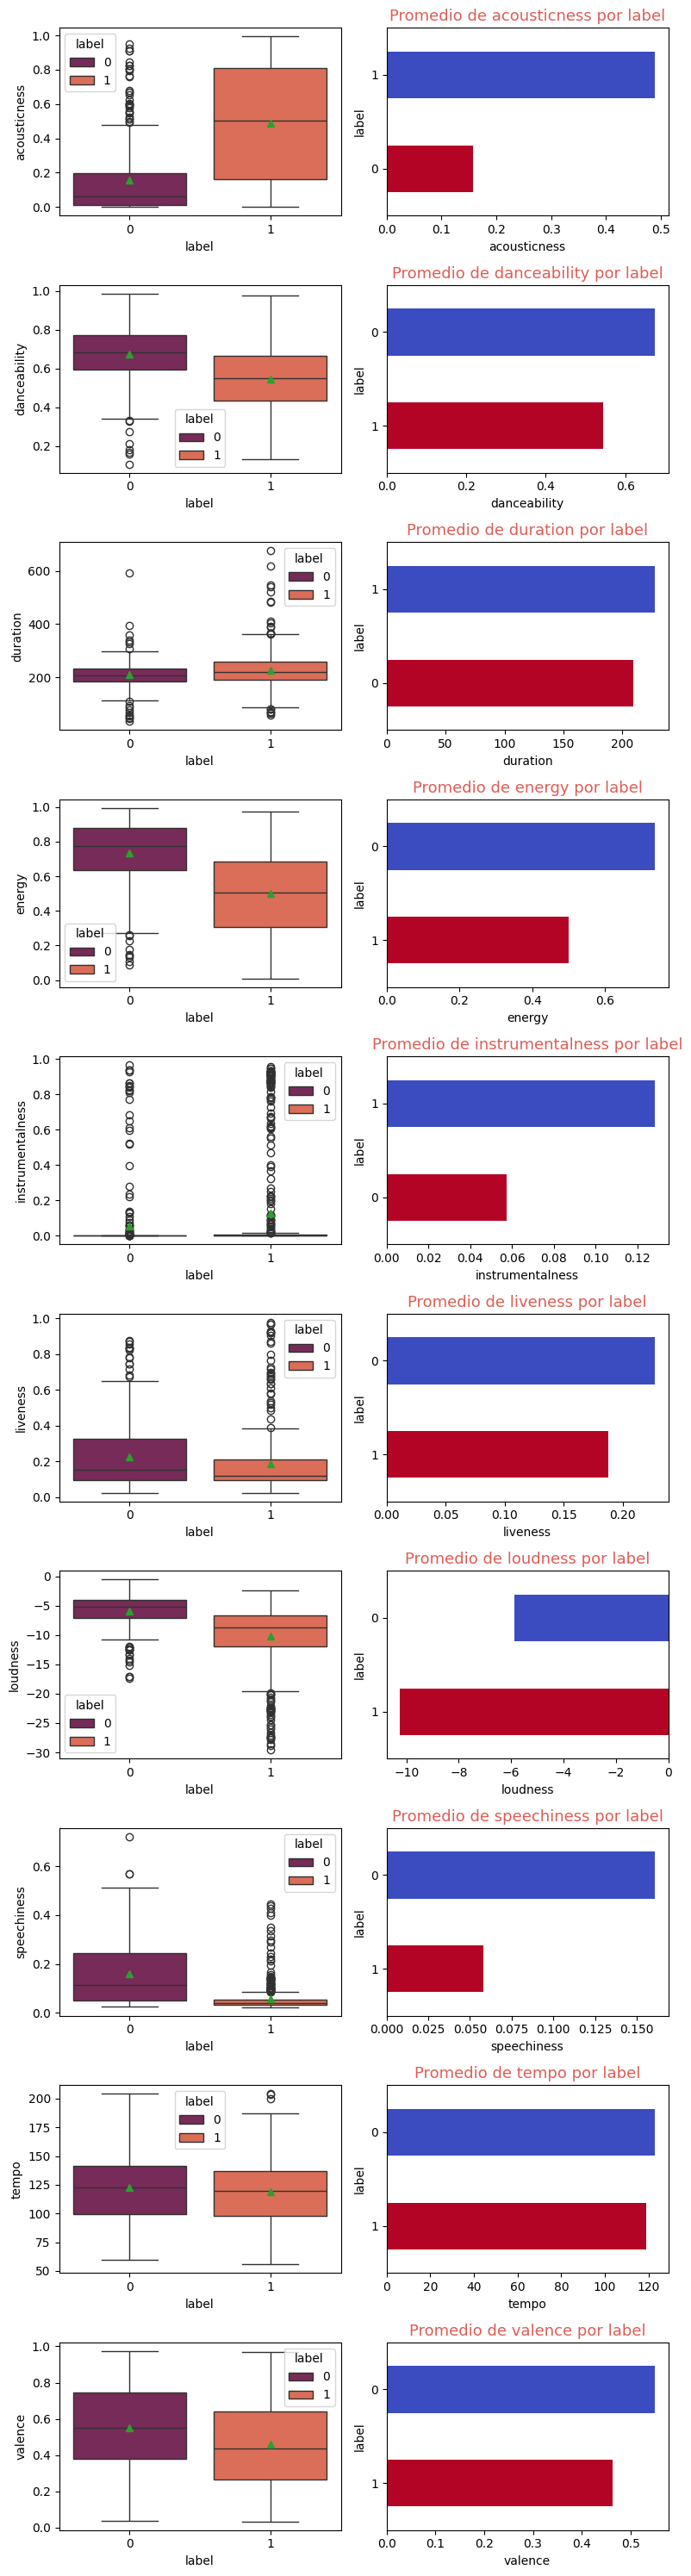

In [ ]:
num_rows = len(NUMERICAL_FEATURES)
num_cols = 2  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 30))

for i, c in enumerate(NUMERICAL_FEATURES):
    
    ax1 = axes[i, 0]
    sns.boxplot(x='label', y=c, orient='v', data=df, hue='label', palette="rocket", showmeans=True, ax=ax1) 
    ax2 = axes[i, 1]
    plot_label_horizontal_bar(c, title=f"Promedio de {c} por label", axis=ax2)

plt.tight_layout()

plt.show()


>       La distribución de las variables según el label dado por el usuario revela algunas preferencias marcadas :

* Según la distribución de la variable **acousticness**, el usuario tiene preferencia por pistas que con un valor mayor a 0.2. Sin embargo, hay algunas con esta característica que son outliers y no son de su gusto.

* El usuarió tiene preferencia por canciones con una **energía** por debajo de 0.6 al igual de una **loudness** por debajo de -6. Estas dos variables están altamente correlacionadas de forma lineal en la mayoría de las pistas, con una correlación de Pearson de 0.86. 

* Según la varibale **speechiness** el usuario no presenta un gusto predominante por las pistas habladas.  

* Hay variables que no parecen influir en el gusto por la pista, dado que tienen distribuciones parecidas y se pueden considerar igual, como lo son el **tempo**,**liveness**,**duration** y la **valencia**.
    
* El gráfico de **instrumentalness** no otroga información clara de la distribucón dada la gran cantidad de outliers. 


# Sesgo y curtosis

Analizamos la distribución de las variables o carácteristicas de las canciones que hacen parte de la lista de reproducción que ha evaluado el usuario.

In [ ]:
# Calculo la simetria de las variables
df_skew = df[NUMERICAL_FEATURES].skew()
df_skew

acousticness        0.534804
danceability       -0.311981
duration            1.576231
energy             -0.458765
instrumentalness    2.488166
liveness            2.156240
loudness           -1.693115
speechiness         2.040370
tempo               0.334763
valence             0.104812
dtype: float64

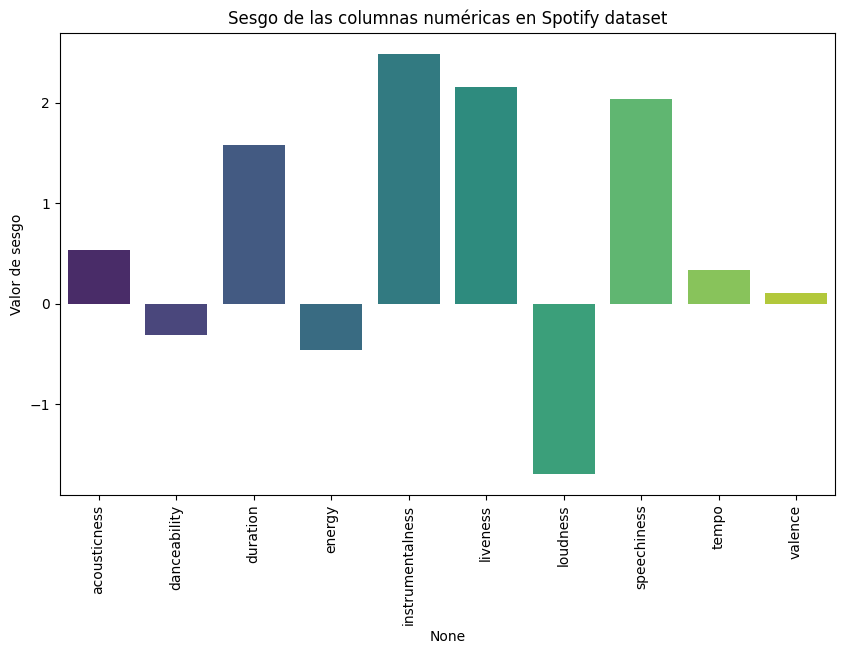

In [ ]:
# Grafico la simetria de las variables

plt.figure(figsize=(10,6))
#sns.barplot(x=df_skew.index, y=df_skew.values, palette="viridis") # Tira un warning de depraecation
sns.barplot(x=df_skew.index, y=df_skew.values, palette="viridis", hue=df_skew.index, legend=False)

# Rotar los nombres de las columnas para que sean legibles
plt.xticks(rotation=90)
# Etiquetas del gráfico
plt.title('Sesgo de las columnas numéricas en Spotify dataset')
plt.ylabel('Valor de sesgo')

# Mostrar el gráfico
plt.show()

Los valores de sesgo-asimetría nos muestra lo siguiente del conjunto de datos:
* La distribución de las variables **instrumentalness**,**liveness**, **speeachiness**, **loudness** y **duration** están altamente sesgadas. Es decir, que sus distribuciones no son normales y presenta una distribución desequilibrada. Los valores positivos nos indican que los datos tienen más peso a la derecha de la distribución, al contrario con valores negativos. Si se quiere ver graficamente este hecho se puede observar la diagonal principal de la pairplot hecha anteriormente.

* Este tipo resultado se espera en la variable duration dado que la duración de una pista es un estandar en la industria músical. 

Más adelante con el cambio de estas a variables catégoricas será más evidente este sesgo. 

In [ ]:
# Calculo la curtosis de las variables numéricas
df_kurtosis = df[NUMERICAL_FEATURES].kurtosis()
df_kurtosis

acousticness       -1.210296
danceability       -0.296706
duration            8.321863
energy             -0.758962
instrumentalness    4.518012
liveness            4.842701
loudness            3.232917
speechiness         4.149336
tempo              -0.246166
valence            -0.911007
dtype: float64

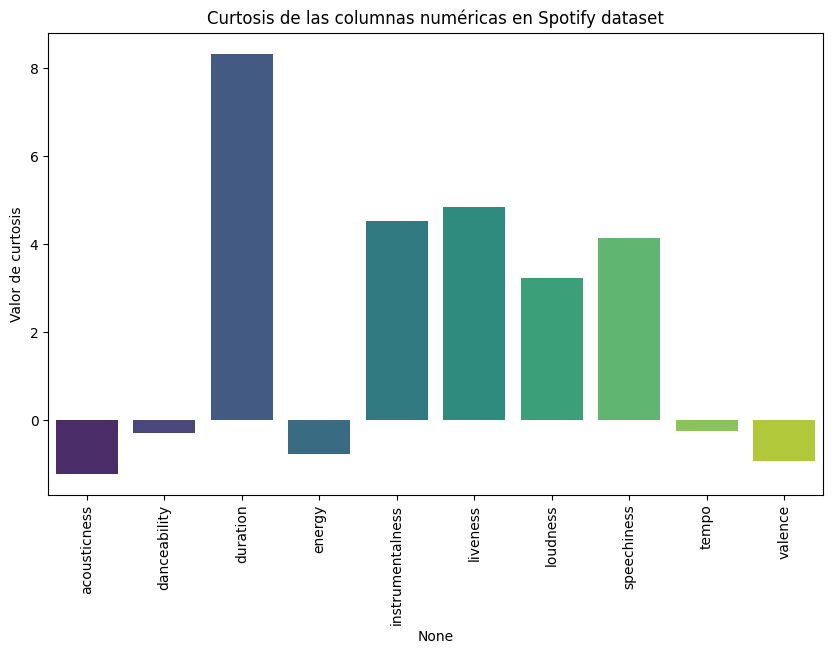

In [ ]:
# Grafico kurtosis
# Crear un gráfico de barras
plt.figure(figsize=(10,6))
#sns.barplot(x=df_kurtosis.index, y=df_kurtosis.values, palette="viridis") # Tira un warning de depraecation
sns.barplot(x=df_kurtosis.index, y=df_kurtosis.values, palette="viridis", hue=df_kurtosis.index, legend=False)

# Rotar los nombres de las columnas para que sean legibles
plt.xticks(rotation=90)

# Etiquetas del gráfico
plt.title('Curtosis de las columnas numéricas en Spotify dataset')
plt.ylabel('Valor de curtosis')

# Mostrar el gráfico
plt.show()

En este caso los datos leptocúrticos son **instrumentalness**, **liveness**, **speeachiness**, **loudness** y **duration**. Lo que significa que tenemos distribuciones con grandes concentraciones de valores en un intervalo dado.

# Grafico de Q-QPlot

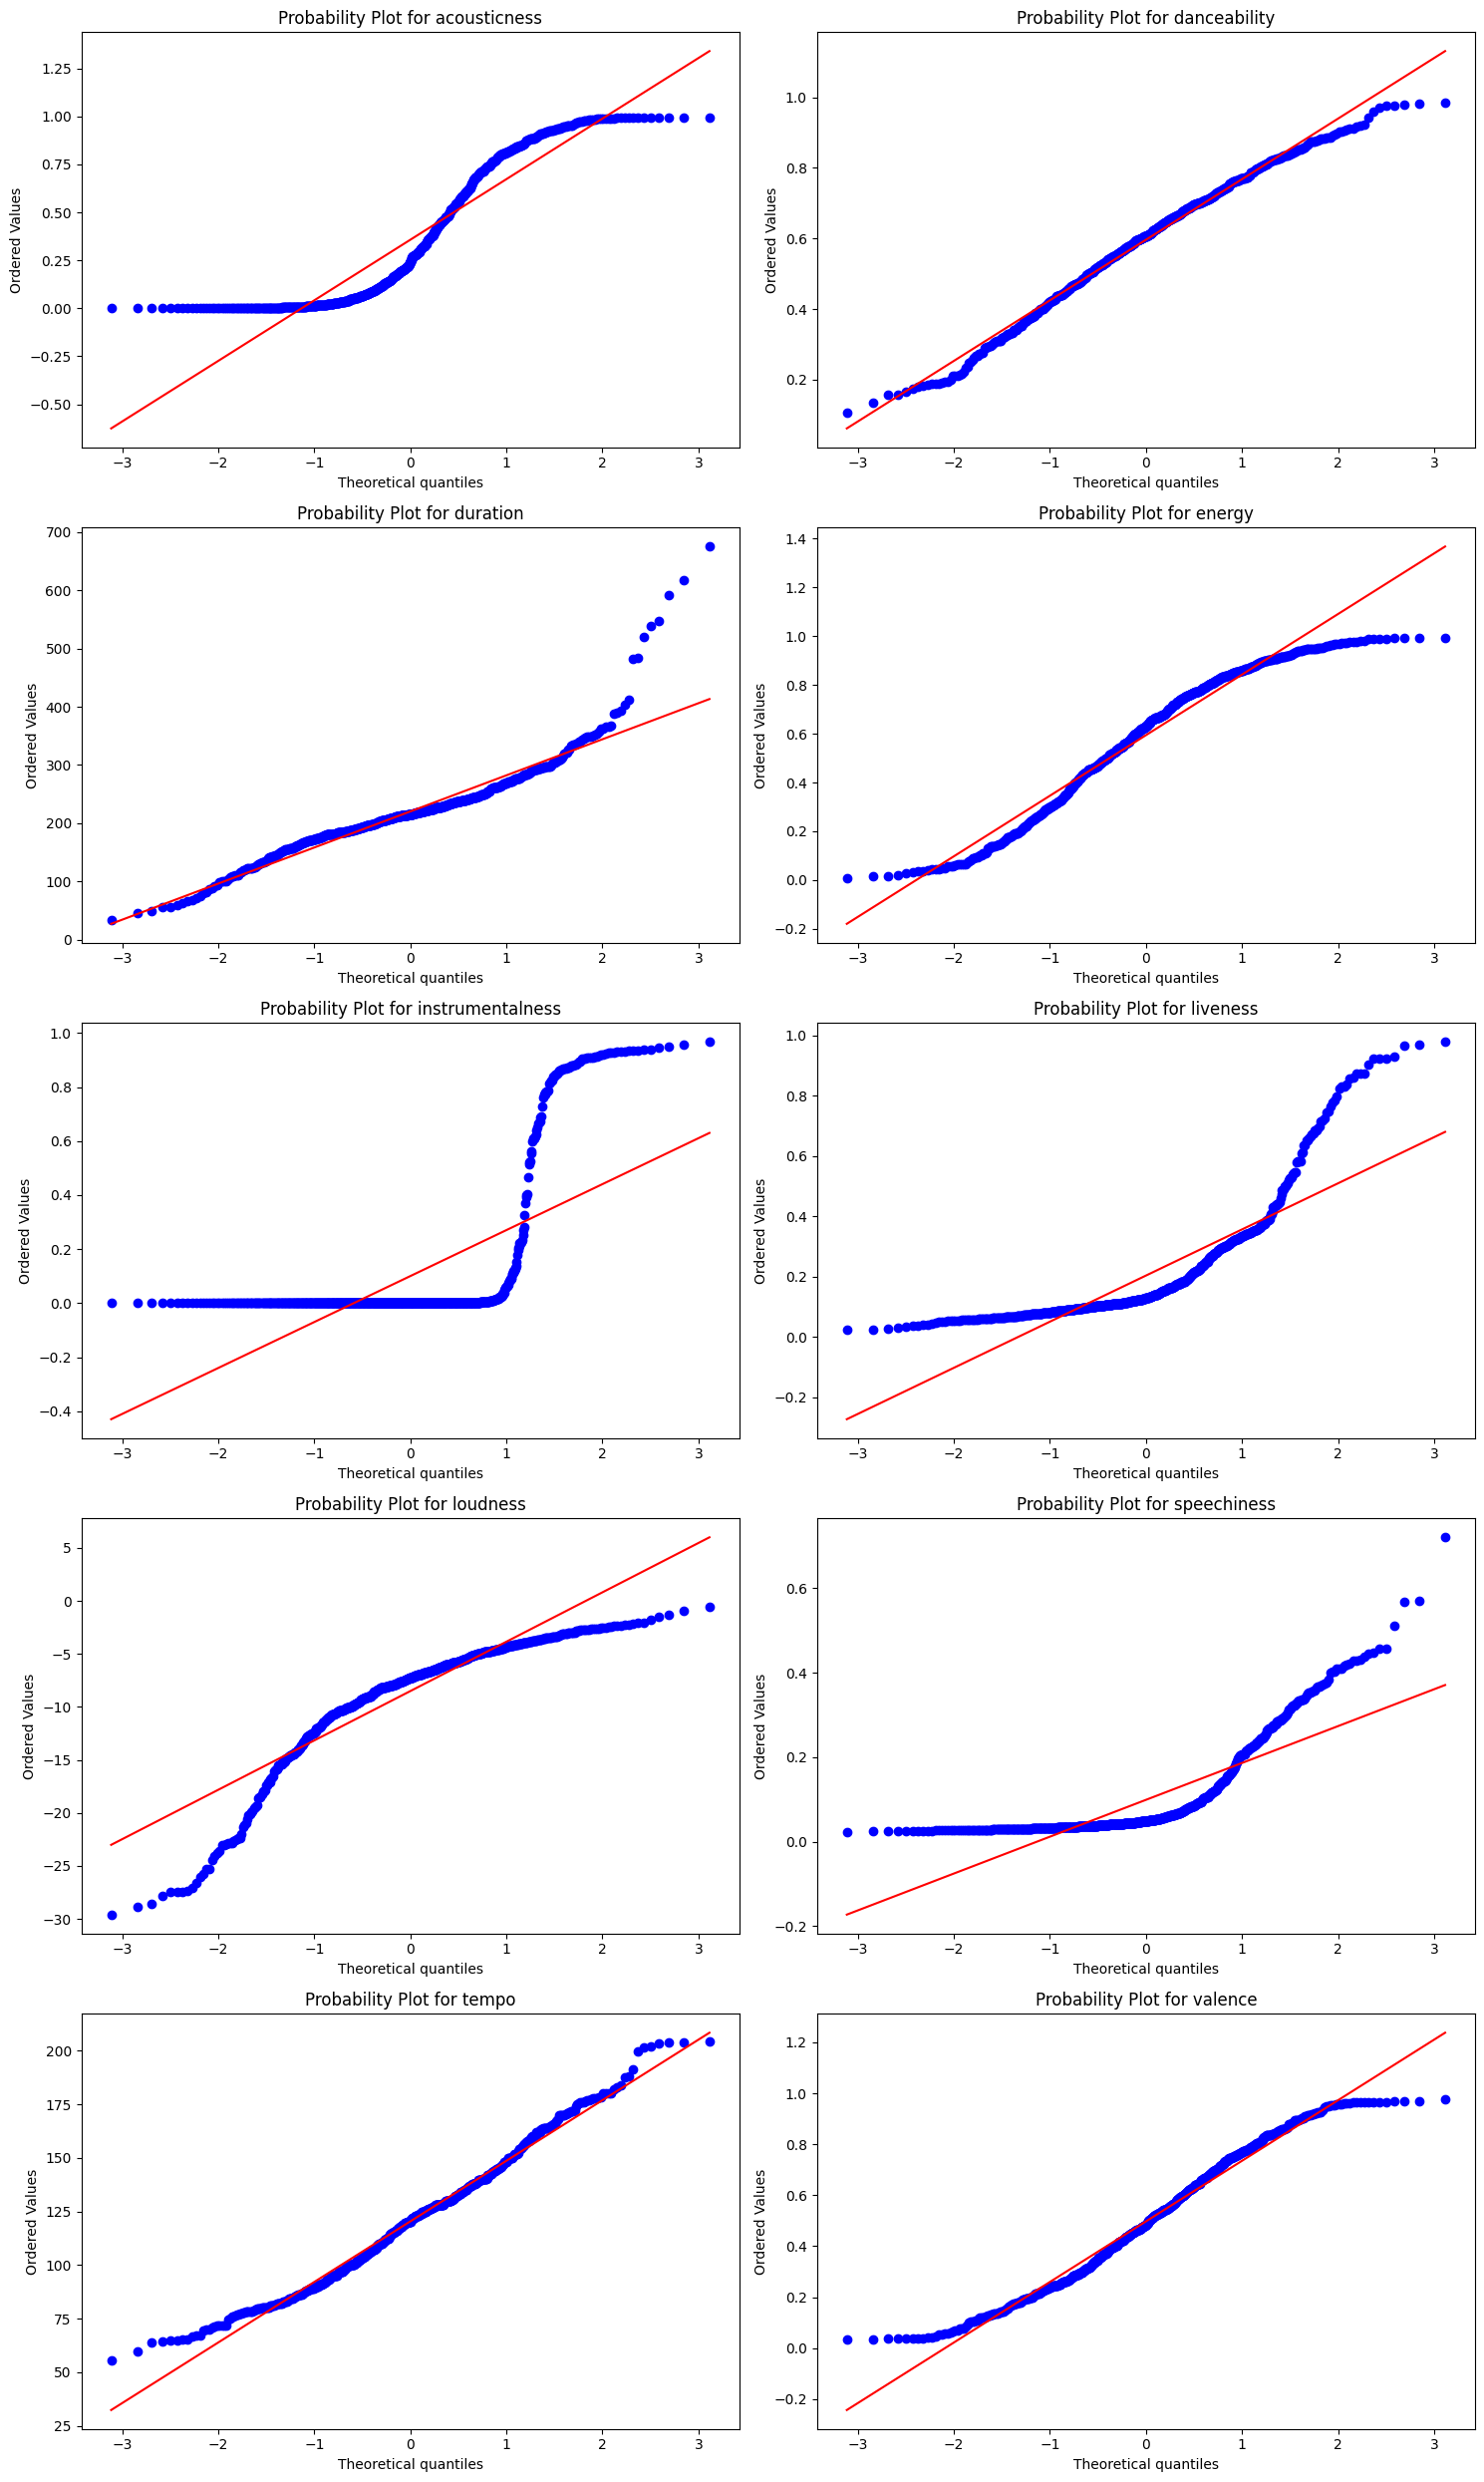

In [ ]:

num_features = len(NUMERICAL_FEATURES)
num_cols = 2  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, c in enumerate(NUMERICAL_FEATURES):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_features > 1 else axes  # Handle the case when there's only one feature

    stats.probplot(df[c], dist="norm", plot=ax)
    ax.set_title(f'Probability Plot for {c}')

# Adjust the layout to prevent overlapping
plt.tight_layout()

plt.show()

### Binning manual

Las siguientes columnas se podrian convertir en variables categoricas:

speechiness:
 - 0 : 0 menor a 0.33    => musica con canto
 - 1 : entre 0.33 y 0.66 => rap
 - 2 : mayor a 0.66      => audolibro

acousticness:
- 0 : 0 menor a 0.50 => No es acustico
- 1 : 1 mayor a 0.50 => Si es acustico

instrumentalness:
- 0: menor a 0.5 = vocal        => 0
- 1: mayor a 0.5 = instrumental => 1

liveness:
- 0 : menor a 0.8 = Estudio => 0
- 1 : mayor a 0.8 = En vivo => 1

valence:
- 0 : menor a 0.5 = triste => 0
- 1 : mayor a 0.5 = feliz => 1




Convertiremos las variables numericas en categóricas.

In [ ]:
# Hago una copia del dataset
df_copia = df.copy() 

#### Redefinimos la variable tempo

In [ ]:
def tempo_to_rythm(tempo):
    if(tempo < 66):
        return 'lento'
    if(66 <= tempo < 76):
        return 'adagio'
    if(76 <= tempo < 108):
        return 'andante'
    if(108 <= tempo < 168):
        return 'allegro'
    if(168 <= tempo):
        return 'presto'
    
apply_conditions_vectorized = np.vectorize(tempo_to_rythm)

In [ ]:
# Reemplazo los valores de la columna 'speechiness' por 0, 1 o 2
df_copia['speechiness'] = df['speechiness'].apply(lambda x: 0 if x <= 0.33 else (1 if x <= 0.66 else 2))  # 0: musica, 1: rap, 2: AUdiolibro 
# Reemplazo los valores de la columna 'acousticness' por 0 o 1 
df_copia['acousticness'] = df['acousticness'].apply(lambda x: 0 if x <= 0.5 else 1) # 0: No acustico, 1: Acustico
# Reemplazo los valores de la columna 'instrumentalness' por 0 o 1
df_copia['instrumentalness'] = df['instrumentalness'].apply(lambda x: 0 if x <= 0.5 else 1) # 0: Vocal, 1: Instrumental
# Reemplazo los valores de la columna 'liveness' por 0 o 1
df_copia['liveness'] = df['liveness'].apply(lambda x: 0 if x <= 0.8 else 1) # 0: Estudio, 1: En vivo
# Reemplazo los valores de la columna 'valence' por 0 o 1
df_copia['valence'] = df['valence'].apply(lambda x: 0 if x <= 0.5 else 1) # 0: Triste, 1: Feliz
# Reemplazo los valores de la columna 'valence' por 0 o 1
df_copia['valence'] = df['valence'].apply(lambda x: 0 if x <= 0.5 else 1) # 0: Triste, 1: Feliz
df_copia['tempo'] = apply_conditions_vectorized(df_copia['tempo']) # 0: lento, 1: adagio, 2: andante, 3: allegro, 4: presto

In [ ]:
df_copia.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,1,0.514,100.125,0.521,1,8,0,-14.835,0,0,allegro,4,0,1
1,0,0.714,207.019,0.614,0,4,0,-6.935,1,0,allegro,4,1,1
2,0,0.630,216.200,0.455,0,5,0,-9.290,1,0,allegro,4,0,1
3,1,0.810,136.413,0.221,0,5,0,-11.005,1,0,allegro,4,1,1
4,1,0.465,181.440,0.459,0,6,0,-8.137,0,0,andante,4,0,1


In [ ]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    int64  
 1   danceability      750 non-null    float64
 2   duration          750 non-null    float64
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    int64  
 5   key               750 non-null    int64  
 6   liveness          750 non-null    int64  
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    int64  
 10  tempo             750 non-null    object 
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    int64  
 13  label             750 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 82.2+ KB


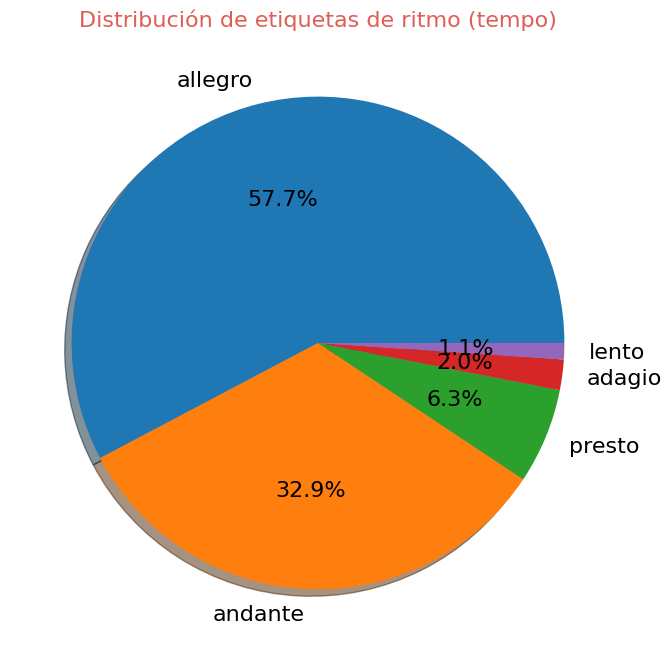

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df_copia["tempo"].value_counts(), labels=df_copia['tempo'].value_counts().axes[0], autopct='%1.1f%%', shadow=True, textprops={'fontsize': 16});
ax.set_title("Distribución de etiquetas de ritmo (tempo)", fontdict={'size': 16, 'color': '#de5d55'});

>   
    - Podemos observar que la mayoria de las canciones tienen un tempo allegro o andante.

#### Redefinimos las variables numericas y categoricas: <br>

speechiness <br>
acousticness <br>
instrumentalness <br>
liveness <br>
valence <br>

In [ ]:
# Redefinidas
NUMERICAL_FEATURES = ['danceability', 'duration', 'energy', 'loudness']
CATEGORICAL_FEATURES = ['acousticness', 'instrumentalness', 'liveness', 'speechiness', 'key', 'mode', 'time_signature', 'valence','tempo']

In [ ]:
# Mostramos un resumen estadístico de las columnas numéricas que quedaron
df_copia[NUMERICAL_FEATURES].describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,750.0,0.596439,0.172036,0.10700,0.48000,0.6060,0.71575,0.986
duration,750.0,220.112733,65.587690,33.84000,185.49025,215.1085,244.23675,675.360
energy,750.0,0.594188,0.253301,0.00925,0.42325,0.6315,0.80475,0.995
loudness,750.0,-8.509339,5.039488,-29.60100,-10.17350,-7.2700,-5.09775,-0.533


In [ ]:
# Mostramos un resumen estadístico de las columnas categóricas incluidas las nuevas
df_copia[CATEGORICAL_FEATURES].describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,750.0,0.340000,0.474025,0.0,0.0,0.0,1.0,1.0
instrumentalness,750.0,0.109333,0.312265,0.0,0.0,0.0,0.0,1.0
liveness,750.0,0.022667,0.148938,0.0,0.0,0.0,0.0,1.0
speechiness,750.0,0.058667,0.240767,0.0,0.0,0.0,0.0,2.0
key,750.0,4.829333,3.636001,0.0,1.0,5.0,8.0,11.0
mode,750.0,0.741333,0.438194,0.0,0.0,1.0,1.0,1.0
time_signature,750.0,3.902667,0.400091,1.0,4.0,4.0,4.0,5.0
valence,750.0,0.486667,0.500156,0.0,0.0,0.0,1.0,1.0


Veo graficamente las variables categoricas nuevas

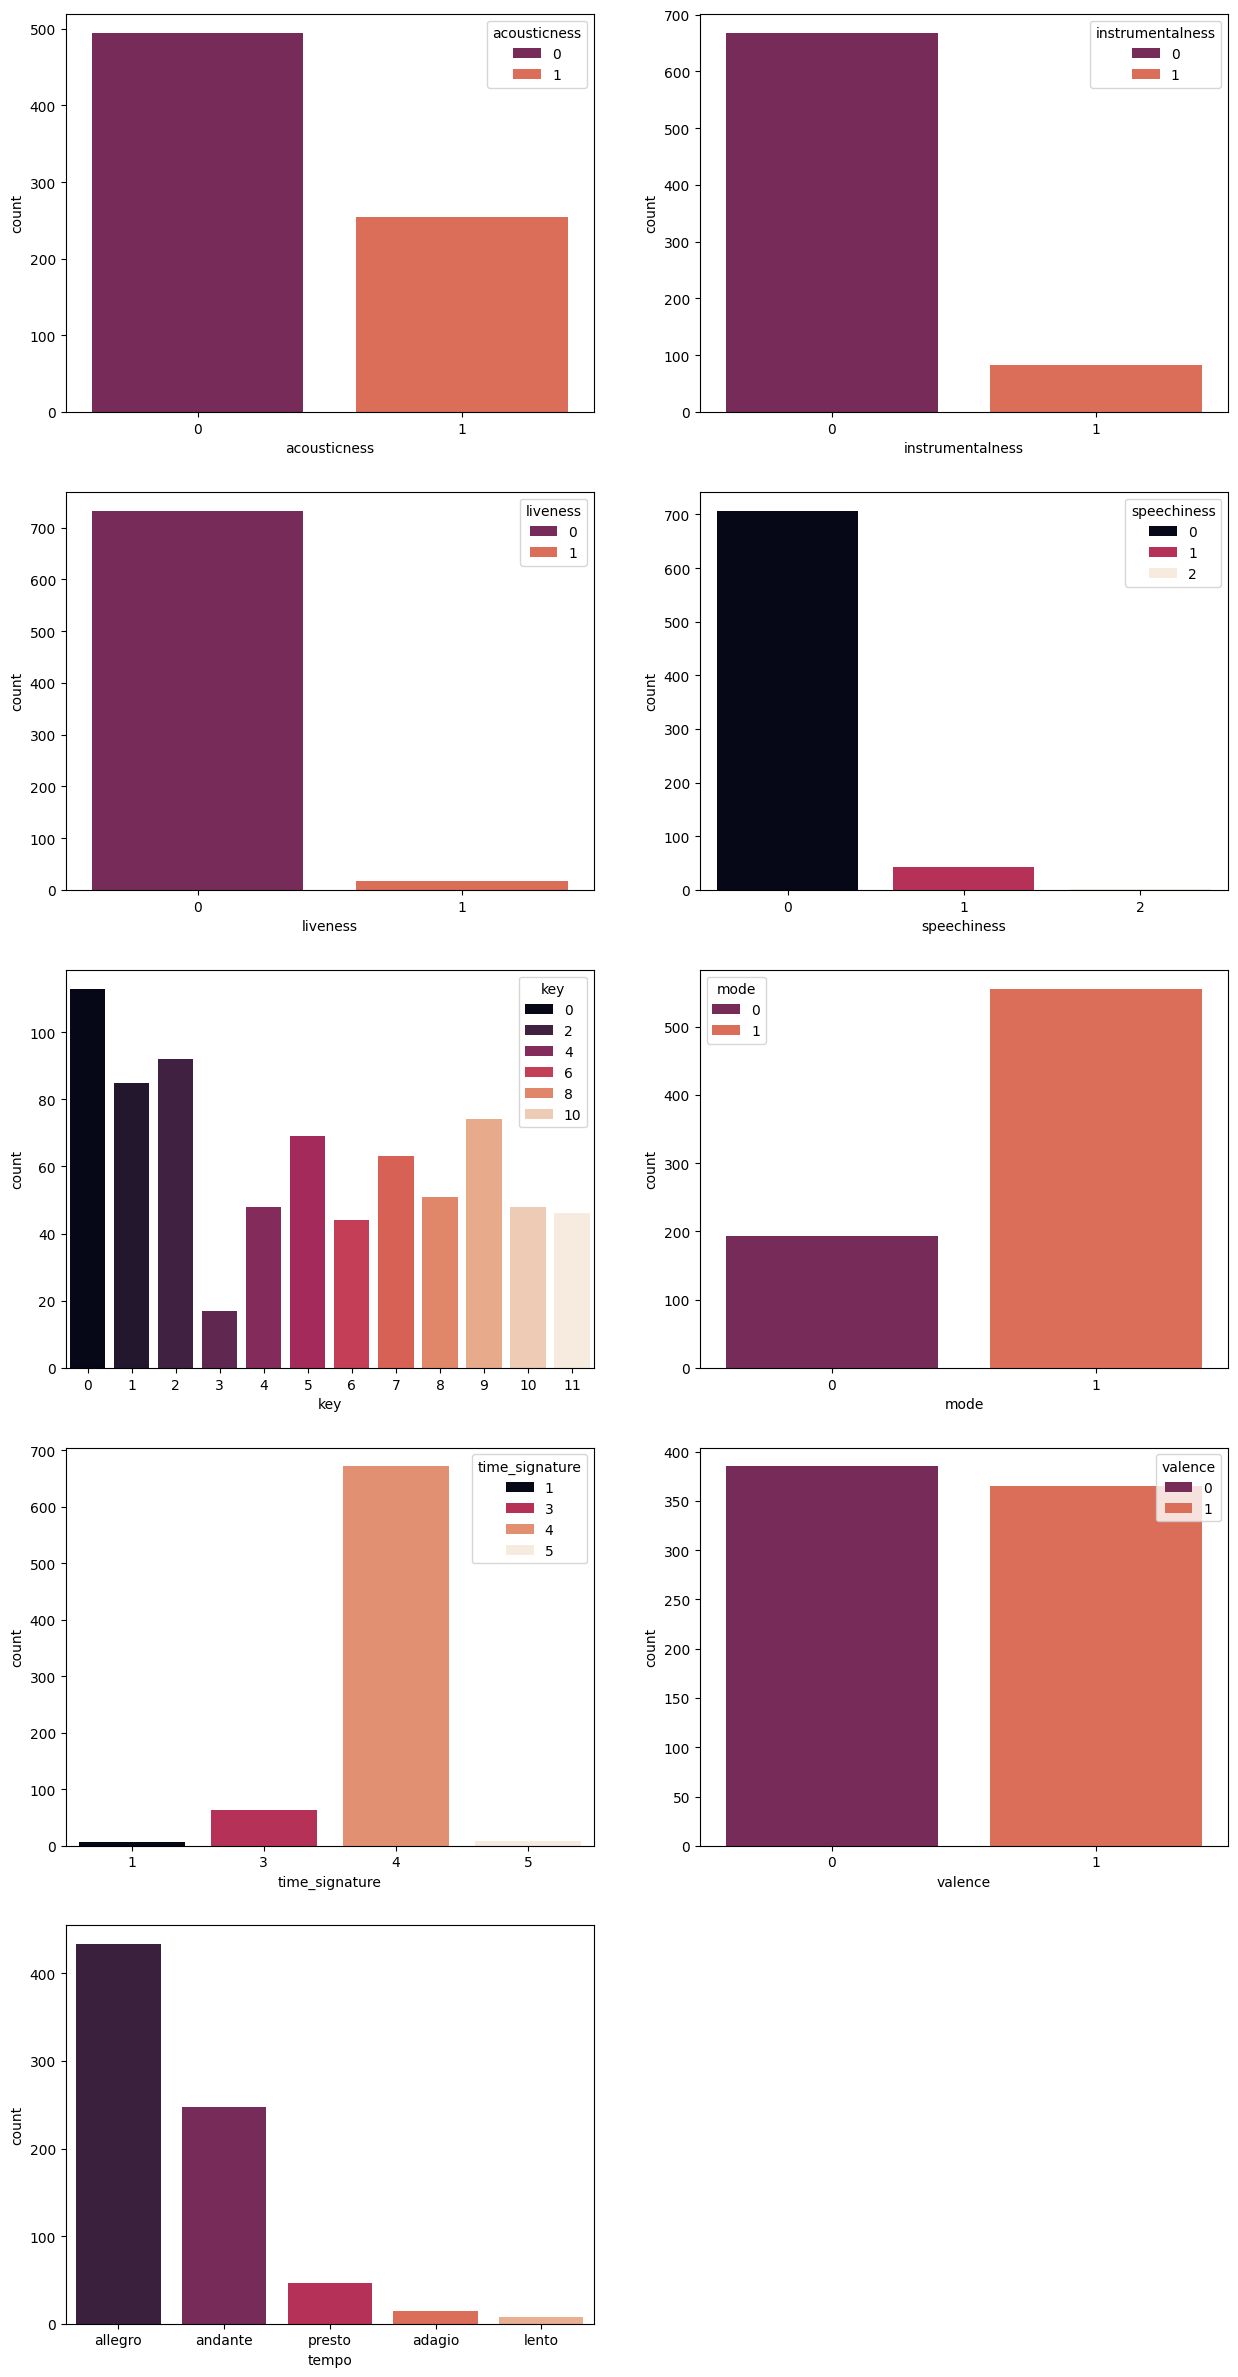

In [ ]:
# Crear una figura con subplots
plt.figure(figsize=(15, 30))
for i, c in enumerate(CATEGORICAL_FEATURES, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=c, data=df_copia, palette="rocket", hue=c)

Con esta nueva categorización se hace más notables los sesgos presentes en algunas de las variables categoricas que se habían encontrado con la medida de simetria y la curtosis. 

Reemplazamos las etiquetas de 'tempo' por valores numéricos.

In [ ]:
# Reemplazo los valores de la columna 'tempo' por valores numéricos
df_copia['tempo'] = df_copia['tempo'].apply(lambda x: 0 if x == 'lento' else (1 if x == 'adagio' else (2 if x == 'andante' else (3 if x == 'allegro' else 4)))) # 0: lento, 1: adagio, 2: andante, 3: allegro, 4: presto

In [ ]:
df_copia.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,1,0.514,100.125,0.521,1,8,0,-14.835,0,0,3,4,0,1
1,0,0.714,207.019,0.614,0,4,0,-6.935,1,0,3,4,1,1
2,0,0.630,216.200,0.455,0,5,0,-9.290,1,0,3,4,0,1
3,1,0.810,136.413,0.221,0,5,0,-11.005,1,0,3,4,1,1
4,1,0.465,181.440,0.459,0,6,0,-8.137,0,0,2,4,0,1


In [ ]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    int64  
 1   danceability      750 non-null    float64
 2   duration          750 non-null    float64
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    int64  
 5   key               750 non-null    int64  
 6   liveness          750 non-null    int64  
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    int64  
 10  tempo             750 non-null    int64  
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    int64  
 13  label             750 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 82.2 KB


In [ ]:
df_copia_2 = df_copia.copy()
df_copia_2.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

# 3.- Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.

- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación
recomendaría? Ensayar distintas técnicas y analizar los resultados.

- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. **Nota**: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo numérico/categórico.

- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?
Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de
entrada de mayor importancia? Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

Como nuestro dataset no posee datos faltantes vamos a insertar datos faltantes.

In [ ]:
# Hacemos una copia del dataset
df_copia_3 = df.copy()

Vamos a agregar valores NaN en el dataframe original

In [ ]:
df_copia_3.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

In [ ]:
# Como no tengo valores nulos, vamos a introducir valores nulos de forma aleatoria en el dataset para ver como se comporta el modelo
# pero queremos que no sean en todas las columnas sino algunas, y de forma aleatoria
import random
import math

# semilla
random.seed(42)

# Define el número de columnas que deseas seleccionar aleatoriamente
num_columnas_seleccionar = 3

# Selecciona aleatoriamente las columnas que se llenarán con valores nulos
columnas_a_introducir_nulos = random.sample(df_copia_3.columns.tolist(), num_columnas_seleccionar)

# Define el porcentaje máximo de valores nulos que deseas introducir en cada columna
porcentaje_nulos_maximo = 0.5  # Por ejemplo, un máximo del 50% de valores nulos

# Inicializa un diccionario para rastrear la cantidad de valores nulos por columna
nulos_por_columna = {}

# Itera sobre las columnas seleccionadas aleatoriamente
for columna in columnas_a_introducir_nulos:
    # Calcula el número de filas en la columna actual
    num_filas = df_copia_3.shape[0]
    
    # Calcula el porcentaje de valores nulos para esta columna de manera aleatoria
    porcentaje_nulos_columna = random.uniform(0, porcentaje_nulos_maximo)
    
    # Calcula cuántos valores nulos introducir en esta columna
    num_nulos_columna = int(porcentaje_nulos_columna * num_filas)
    
    # Genera índices aleatorios para las filas en esta columna
    filas_con_nulos_columna = np.random.choice(num_filas, num_nulos_columna, replace=True)
    
    # Establece los valores correspondientes en esas ubicaciones como NaN
    for fila in filas_con_nulos_columna:
        df_copia_3.at[fila, columna] = np.nan
    
    # Registra la cantidad de valores nulos introducidos en esta columna
    nulos_por_columna[columna] = num_nulos_columna

Vemos que se han agregado datos NaN a 3 columnas del dataset.

In [ ]:
df_copia_3.isnull().sum()

acousticness         48
danceability         85
duration              0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo               241
time_signature        0
valence               0
label                 0
dtype: int64

In [ ]:
df_copia_3.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100.125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207.019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,NaN,4,0.582,1
2,0.333,0.630,216.200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136.413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,NaN,4,0.798,1
4,0.883,NaN,181.440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,NaN,4,0.288,1


Dado que nuestro Dataset originalmente no tenía nulos, los agregamos de forma aleatoria, por tanto estamos ante un caso de Missing Data Completely at Random (MCAR).

### Usaremos la tecnica de imputación estadística:

- Usaremos *SimpleImputer* de SKLearn para imputar por:
    - Promedio
    - Mediana
    - Moda
    - Constante
    
- Haremos la búsqueda de mejores parámetros por Grid Search.

In [ ]:
# Veo las columnas que tienen valores nulos
df_copia_3.isnull().sum() 

acousticness         48
danceability         85
duration              0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo               241
time_signature        0
valence               0
label                 0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

#X = df_copia_3.values[:, :-1] # Todas las filas, todas las columnas menos la última
X = df_copia_3[['acousticness','danceability','tempo']].values[:, :-1]
y = df_copia_3.values[:, -1]


Búsqueda de mejores parámetros por Grid Search.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ( 'imputer' ,SimpleImputer()), 
    ( 'lr' , LogisticRegression() )
])

param_grid = {
    "imputer__strategy": ['most_frequent', 'mean','constant','median' ],
    "lr__max_iter": [1000]
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
search = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=cv)
results =search.fit(X,y)


In [ ]:
print('Mejor Puntaje (Accuracy): %.3f ' % results.best_score_)
print('Mejor parámetro: %s ' % results.best_params_)

Mejor Puntaje (Accuracy): 0.723 
Mejor parámetro: {'imputer__strategy': 'median', 'lr__max_iter': 1000} 


In [ ]:
pd.DataFrame(results.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_imputer__strategy,param_lr__max_iter,params,split0_test_score,split1_test_score,split2_test_score,...,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002047,0.000091,0.000403,0.000008,most_frequent,1000,"{'imputer__strategy': 'most_frequent', 'lr__ma...",0.686667,0.700000,0.700000,...,0.620000,0.700000,0.706667,0.726667,0.713333,0.740000,0.680000,0.702933,0.035180,4
1,0.001978,0.000115,0.000409,0.000031,mean,1000,"{'imputer__strategy': 'mean', 'lr__max_iter': ...",0.693333,0.700000,0.733333,...,0.653333,0.706667,0.726667,0.740000,0.706667,0.766667,0.673333,0.722133,0.034446,2
2,0.001630,0.000041,0.000389,0.000006,constant,1000,"{'imputer__strategy': 'constant', 'lr__max_ite...",0.720000,0.693333,0.686667,...,0.646667,0.706667,0.720000,0.720000,0.720000,0.706667,0.666667,0.706133,0.029929,3
3,0.002078,0.000078,0.000398,0.000005,median,1000,"{'imputer__strategy': 'median', 'lr__max_iter'...",0.686667,0.693333,0.726667,...,0.660000,0.713333,0.720000,0.766667,0.700000,0.753333,0.680000,0.722933,0.036906,1


Comparación de resultados por K-Folds.

In [ ]:
from sklearn.model_selection import cross_val_score

results=[]
for param in param_grid["imputer__strategy"]:
    pipeline = Pipeline(steps=[
        ( 'imputer' ,SimpleImputer(strategy=param)), 
        ( 'lr' , LogisticRegression(max_iter=1000) )
    ])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring= 'accuracy' , cv=cv, n_jobs=-1)    
    results.append(scores)

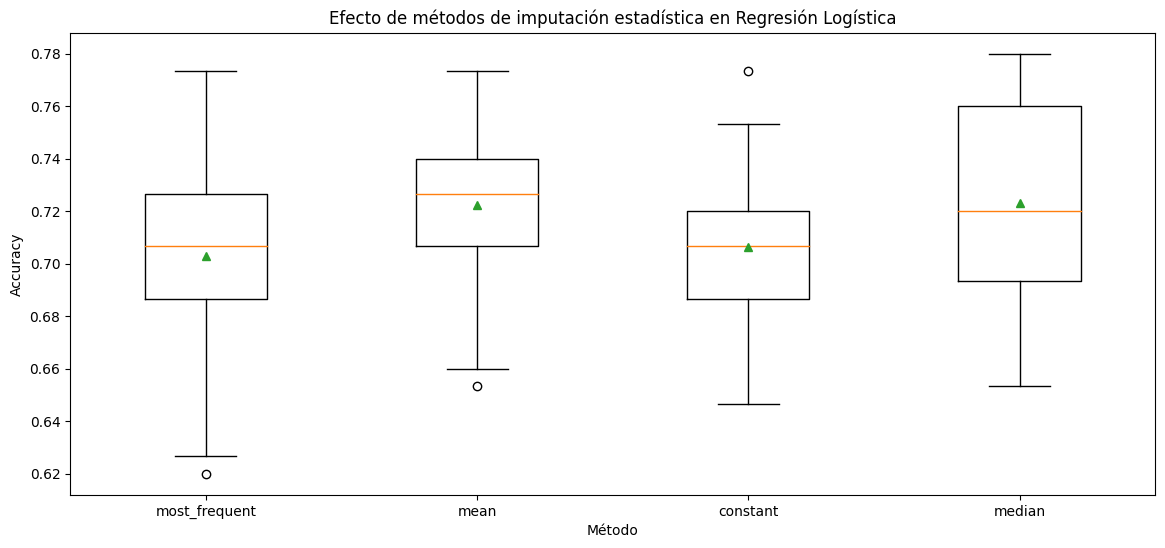

In [ ]:
fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,labels=param_grid["imputer__strategy"],showmeans=True)
axes.set_xlabel("Método")
axes.set_ylabel("Accuracy")
axes.set_title("Efecto de métodos de imputación estadística en Regresión Logística");

# Discretización de variables continuas 

In [ ]:
df_copia_2

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,1,0.514,100.125,0.521,1,8,0,-14.835,0,0,3,4,0,1
1,0,0.714,207.019,0.614,0,4,0,-6.935,1,0,3,4,1,1
2,0,0.630,216.200,0.455,0,5,0,-9.290,1,0,3,4,0,1
3,1,0.810,136.413,0.221,0,5,0,-11.005,1,0,3,4,1,1
4,1,0.465,181.440,0.459,0,6,0,-8.137,0,0,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0.374,333.827,0.943,0,6,0,-4.108,0,0,3,4,0,0
746,0,0.487,213.000,0.867,0,10,0,-3.293,0,0,3,4,0,0
747,1,0.605,125.867,0.314,0,0,0,-7.631,1,0,3,4,1,1
748,0,0.700,249.493,0.823,0,3,0,-6.892,1,0,3,4,1,1


>       Las variables continuas que se van a discretizar (o binear) son danceability y energy : 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_copia_2[['danceability', 'energy']],
    df_copia_2['label'],
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((525, 2), (225, 2))

Vamos a probar con KBinsDiscretizer con tres estrategias diferentes : 

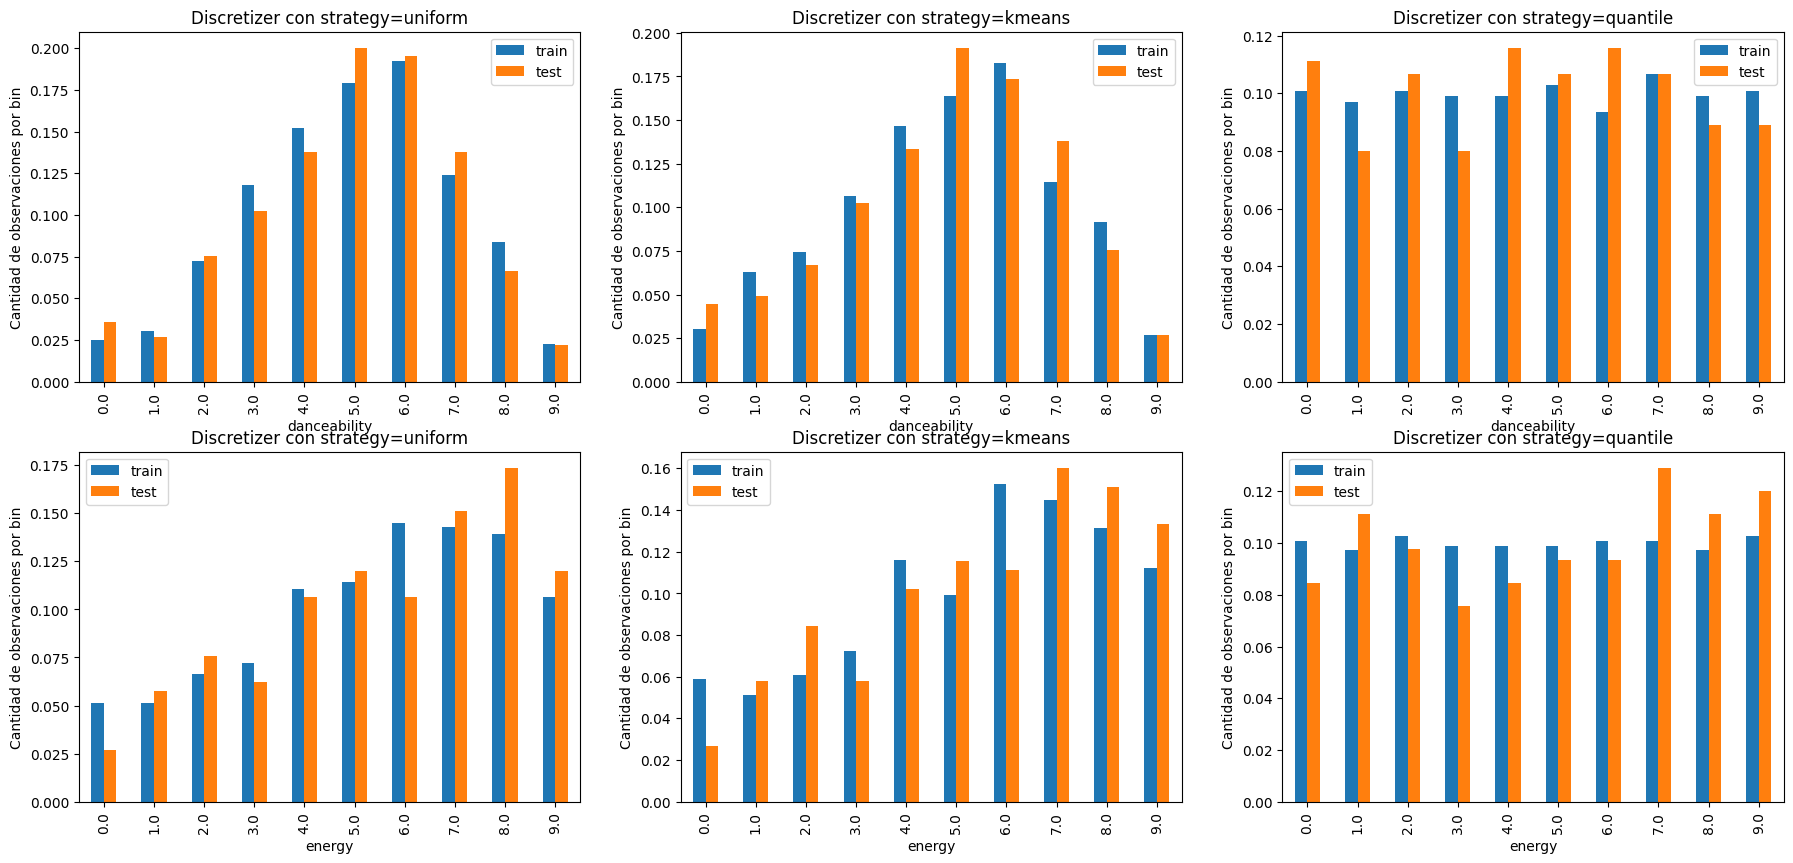

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

discretizers = [
    ("uniform", KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None)),    
    ("kmeans", KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans', subsample=None)),
    ("quantile", KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile', subsample=None))
]
     
fig,axes=plt.subplots(2,len(discretizers),figsize=(22,10))

for i,d in enumerate(discretizers):
    name,disc = d[0],d[1]
    disc.fit(X_train[['danceability', 'energy']])
    #disc.bin_edges_
    
    train_t = disc.transform(X_train[['danceability', 'energy']])
    train_t = pd.DataFrame(train_t, columns = ['danceability', 'energy'])
    train_t.head()
    
    test_t = disc.transform(X_test[['danceability', 'energy']])
    test_t = pd.DataFrame(test_t, columns = ['danceability', 'energy'])
     
    t1 = train_t.groupby(['danceability'])['danceability'].count() / len(train_t)
    t2 = test_t.groupby(['danceability'])['danceability'].count() / len(test_t)

    t3 = train_t.groupby(['energy'])['energy'].count() / len(train_t)
    t4 = test_t.groupby(['energy'])['energy'].count() / len(test_t)
     
     
    tmp = pd.concat([t1, t2], axis=1)
    tmp_2 = pd.concat([t3, t4], axis=1)
    tmp.columns = ['train', 'test']
    tmp_2.columns = ['train', 'test']
    tmp.plot.bar(ax=axes[0][i])
    tmp_2.plot.bar(ax=axes[1][i])
    axes[0][i].set_title("Discretizer con strategy={}".format(name));
    axes[0][i].set_ylabel('Cantidad de observaciones por bin');
    axes[1][i].set_title("Discretizer con strategy={}".format(name));
    axes[1][i].set_ylabel('Cantidad de observaciones por bin');

>   
    En las estrategias uniform y kmeans algunos intervalos quedaron muy pequeños por lo que usaremos la estrategia de quantiles

In [ ]:
# Crear una instancia de KBinsDiscretizer con la estrategia de "quantile"
# , subsample=None
discretizador_final = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [ ]:
# Ajustar y transformar las columnas 'energy' y 'danceability'
discretizador_final.fit(df_copia_2[['energy', 'danceability']])
discretizador_data = discretizador_final.transform(df_copia_2[['energy', 'danceability']])

In [ ]:
# Convertir los datos discretizados en un DataFrame y asignar nombres a las columnas
discretizado_df = pd.DataFrame(discretizador_data, columns=['energy_discretized', 'danceability_discretized'])

In [ ]:
discretizado_df

,energy_discretized,danceability_discretized
0,3.0,3.0
1,4.0,7.0
2,2.0,5.0
3,1.0,8.0
4,2.0,2.0
...,...,...
745,9.0,1.0
746,8.0,2.0
747,1.0,4.0
748,7.0,7.0


In [ ]:
# Opcional: Añadir las nuevas columnas discretizadas al DataFrame original
df_copia_2 = pd.concat([df_copia_2, discretizado_df], axis=1)

In [ ]:
df_copia_2.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label,energy_discretized,danceability_discretized
0,1,0.514,100.125,0.521,1,8,0,-14.835,0,0,3,4,0,1,3.0,3.0
1,0,0.714,207.019,0.614,0,4,0,-6.935,1,0,3,4,1,1,4.0,7.0
2,0,0.630,216.200,0.455,0,5,0,-9.290,1,0,3,4,0,1,2.0,5.0
3,1,0.810,136.413,0.221,0,5,0,-11.005,1,0,3,4,1,1,1.0,8.0
4,1,0.465,181.440,0.459,0,6,0,-8.137,0,0,2,4,0,1,2.0,2.0


In [ ]:
# Eliminar las columnas 'energy' y 'danceability'
df_copia_2 = df_copia_2.drop(columns=['energy', 'danceability'])

In [ ]:
# eliminar las columnas 'energy' y 'danceability' de la lista de variables numéricas
NUMERICAL_FEATURES.remove('energy')
NUMERICAL_FEATURES.remove('danceability')

# agregar las columnas discretizadas a la lista de variables numéricas
NUMERICAL_FEATURES.append('energy_discretized')
NUMERICAL_FEATURES.append('danceability_discretized')

In [ ]:
df_copia_2.head()

,acousticness,duration,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label,energy_discretized,danceability_discretized
0,1,100.125,1,8,0,-14.835,0,0,3,4,0,1,3.0,3.0
1,0,207.019,0,4,0,-6.935,1,0,3,4,1,1,4.0,7.0
2,0,216.200,0,5,0,-9.290,1,0,3,4,0,1,2.0,5.0
3,1,136.413,0,5,0,-11.005,1,0,3,4,1,1,1.0,8.0
4,1,181.440,0,6,0,-8.137,0,0,2,4,0,1,2.0,2.0


In [ ]:
# Reorganiz las columnas del dataframe y oondre la columna 'label' al final del dataframe
df_copia_2 = df_copia_2[['acousticness', 'instrumentalness', 'liveness', 'speechiness', 'key', 'mode', 'time_signature', 'valence', 'tempo', 'energy_discretized', 'danceability_discretized', 'label']]

In [ ]:
df_copia_2.head()

,acousticness,instrumentalness,liveness,speechiness,key,mode,time_signature,valence,tempo,energy_discretized,danceability_discretized,label
0,1,1,0,0,8,0,4,0,3,3.0,3.0,1
1,0,0,0,0,4,1,4,1,3,4.0,7.0,1
2,0,0,0,0,5,1,4,0,3,2.0,5.0,1
3,1,0,0,0,5,1,4,1,3,1.0,8.0,1
4,1,0,0,0,6,0,4,0,2,2.0,2.0,1


## Selección de features

In [ ]:
# Selecciono todas las columnas menos label
X = df_copia_2.drop(columns=['label']).values
# Selecciono la columna label
y = df_copia_2['label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((525, 11), (225, 11))

In [ ]:
# Elimino las columnas cuya varianza sea menor a 0.01
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
X_train_red = sel.fit_transform(X_train);
X_test_red = sel.transform(X_test)
print(sel.variances_)
X_train_red.shape, X_test_red.shape

[ 0.22470385  0.10414875  0.02414875  0.05890612 13.34028481  0.19644082
  0.15092971  0.24989025  0.44154195  8.43067937  8.23201814]


((525, 11), (225, 11))

In [ ]:
# Preparo los datos para entrenar el modelo
df_train = pd.DataFrame(np.concatenate([X_train,y_train[:,np.newaxis]], axis=1), 
                        columns=df_copia_2.columns[np.concatenate([sel.get_support(), [True]])]) # concatena las columnas de X_train y y_train, y las guarda en un dataframe con los nombres de las columnas que se obtienen de sel.get_support() y le agrega la columna label
df_test = pd.DataFrame(np.concatenate([X_test_red,y_test[:,np.newaxis]], axis=1), 
                        columns=df_copia_2.columns[np.concatenate([sel.get_support(), [True]])]) # concatena las columnas de X_test y y_test, y las guarda en un dataframe con los nombres de las columnas que se obtienen de sel.get_support() y le agrega la columna label
df_train.head(5) 

,acousticness,instrumentalness,liveness,speechiness,key,mode,time_signature,valence,tempo,energy_discretized,danceability_discretized,label
0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,2.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,8.0,1.0,3.0,0.0,2.0,3.0,1.0,0.0
2,0.0,0.0,0.0,0.0,8.0,1.0,4.0,0.0,2.0,7.0,6.0,0.0
3,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,2.0,1.0,4.0,1.0,2.0,6.0,3.0,1.0


In [ ]:
X_train_red.shape

(525, 11)

### Graficamos las correlaciones de Pearson y Spearman


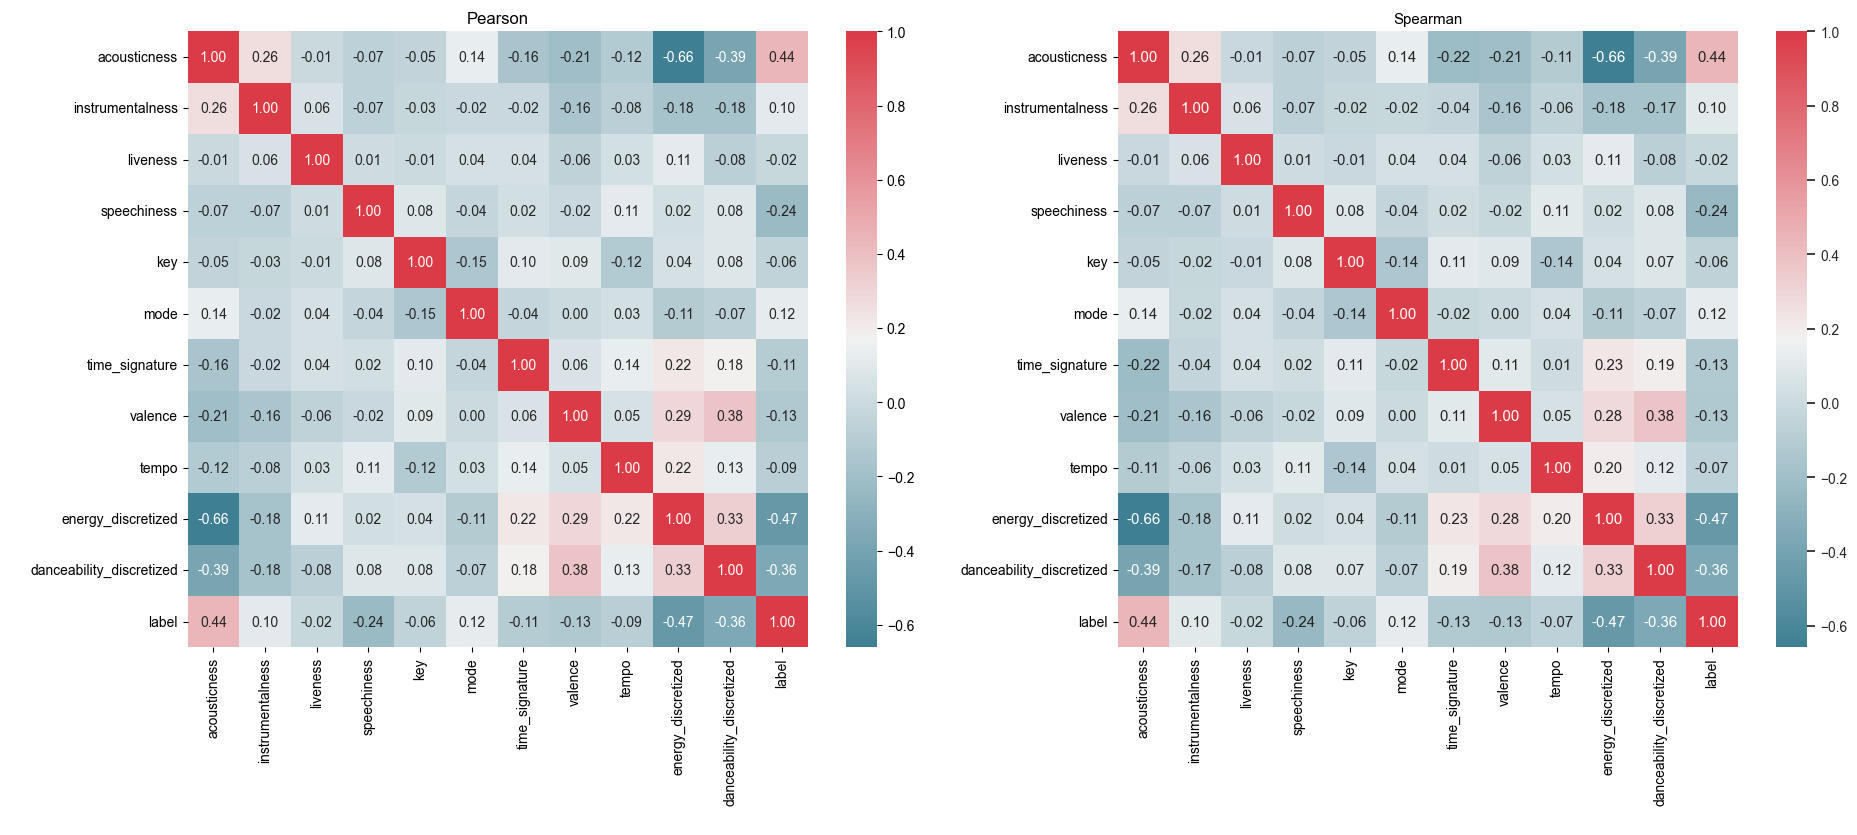

In [ ]:
# Grafics
fig, axes = plt.subplots(1,2,figsize=(22,8))

r = df_train.corr(method='pearson')
axes[0].set_title("Pearson")
sns.heatmap(r, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f",ax=axes[0])
sns.set(font_scale=0.9)

rho = df_train.corr(method='spearman')
axes[1].set_title("Spearman")
sns.heatmap(rho, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f")
sns.set(font_scale=0.9)

A simple vista podemos ver que existen varias correlaciones altas que nos hacen pensar que hay variables que se relacionan e interpretan de la misma manera, en el caso de las correlaciones positivas, o son opuestas en el caso de las correlaciones negativas. Son el caso de :
* **Energy** y **loudness** que presentan una correlación de 0.83  indicandonos que pueden describir la misma característica de la canción. Si se llega a probar dicho supuesto una de ellas se debe de eliminar del modelo que se creará pues otorgaría información redundante.
* **Energy** y **acousticness** tienen una correlación negativa de -0.78. De lo que podría inferirse que  las canciones que se consideran acusticas no tienen una clasificación alta en energí y vis ceversa. Esta misma situación se nota entre **energy** u **loudness** con un puntaje de -0.7, resultado de esperarse dada la anterior correlación. 

In [ ]:
# Imprimo los valores de mayor a menor de correlación de Pearson 
df.corr()['label'].abs().sort_values(ascending=False)

label               1.000000
speechiness         0.480931
acousticness        0.479307
energy              0.459088
loudness            0.424345
danceability        0.368501
valence             0.178546
time_signature      0.149962
duration            0.138562
instrumentalness    0.133523
liveness            0.108682
mode                0.080375
key                 0.075631
tempo               0.071652
Name: label, dtype: float64

In [ ]:
# Imprimo los valores de mayor a menor de correlación de Spearman
df.corr("spearman")['label'].abs().sort_values(ascending=False)

label               1.000000
speechiness         0.517396
loudness            0.501518
acousticness        0.485177
energy              0.472781
danceability        0.383850
valence             0.180897
time_signature      0.166740
instrumentalness    0.165762
duration            0.149453
liveness            0.104337
mode                0.080375
key                 0.078351
tempo               0.059395
Name: label, dtype: float64

> Podemos decir despues de visualizar las correlaciones que las variables que poseen mayor influencia en la variable label son:

- speechiness
- acousticness
- energy
- danceability

Pero para mejorar nuestra visón, emplearemos Información Mutua para comparar.

Una vez obtenidos los coeficientes de correlación, puedo seleccionar los $k$ features con mayor correlación con la varible de salida. Asimismo, esta matriz nos permitiría eliminar variables cuya correlación sea muy alta. En este ejemplo se podría pensar en quedarse con acousticness, energy_discretized y danceability_discretized

- Calculemos la Información Mutua

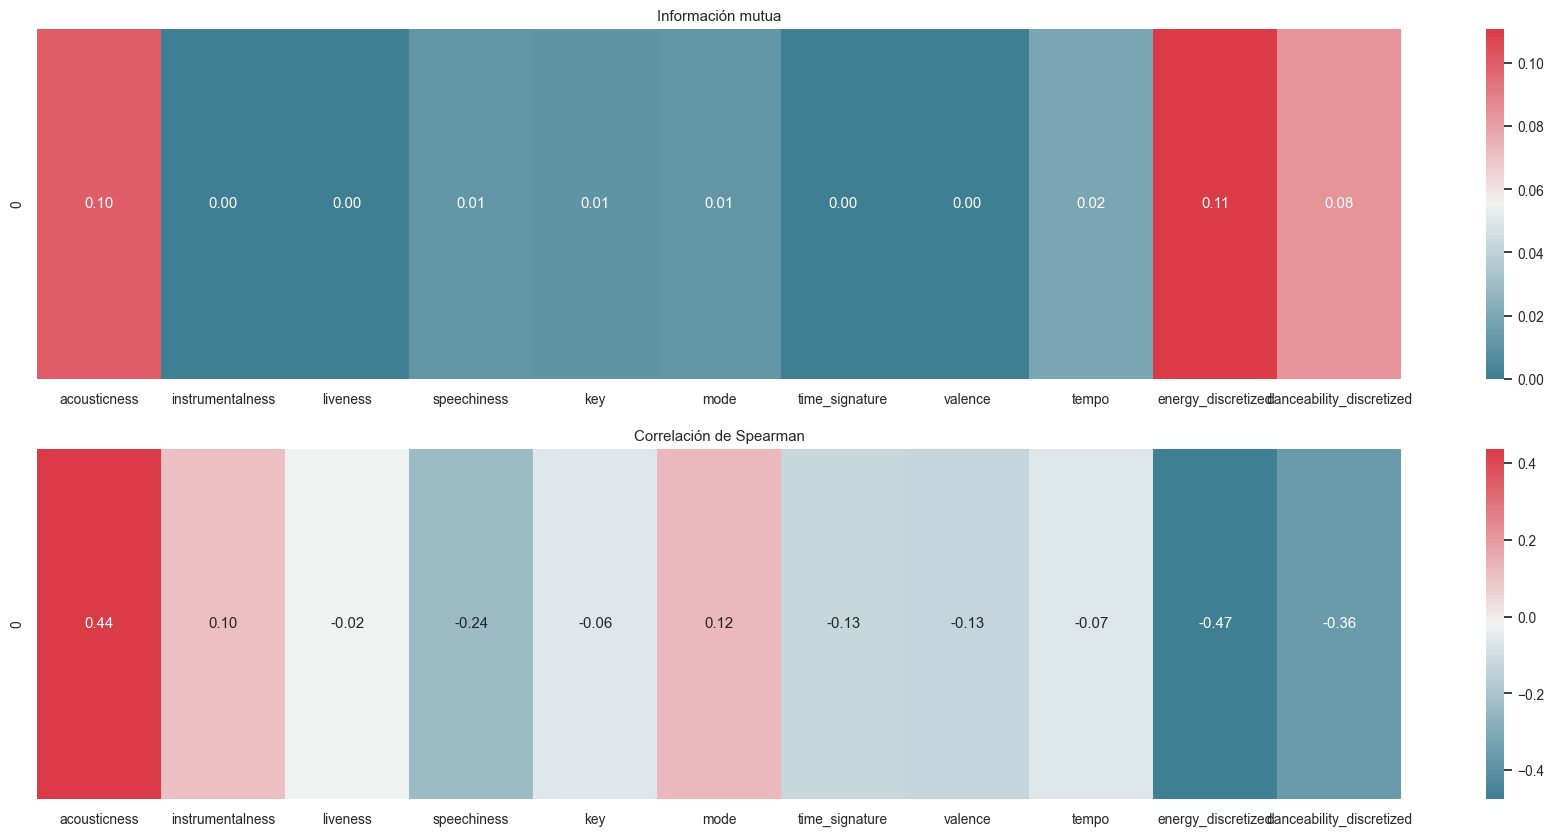

In [ ]:
#from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
#MI = mutual_info_regression(X_train_red, y_train)
MI = mutual_info_classif(X_train_red, y_train)
fig, ax = plt.subplots(2,1, figsize=(22,10))
ax[0].set_title('Información mutua')
sns.heatmap([MI],ax=ax[0],cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax[0].set_xticklabels(df_train.columns.values[:-1])

ax[1].set_title('Correlación de Spearman')
sns.heatmap([rho.iloc[-1][:-1]],cmap=sns.diverging_palette(220,10,as_cmap=True),ax=ax[1], annot=True,fmt=".2f")
ax[1].set_xticklabels(df_train.columns.values[:-1]);

### Selección de features usando Scikit-Learn

Vamos usar esta porque se visualiza mejor

In [ ]:
def  row_norms(Z,squared=True):
    norms = np.einsum('ij,ij->i', Z, Z)
    return norms
def my_pearsonF(Z,y_train):
    Z = X_train_red
    n_samples = Z.shape[0]
    center = True
    # compute centered values
    # note that E[(x - mean(x))*(y - mean(y))] = E[x*(y - mean(y))], so we
    # need not center X
    if center:
        y_train = y_train - np.mean(y_train)
        Z_means = Z.mean(axis=0)
        # compute the scaled standard deviations via moments
        Z_norms = np.sqrt(row_norms(Z.T, squared=True) -
                          n_samples * Z_means ** 2)
    else:
        Z_norms = row_norms(Z.T)

    # compute the correlation
    corr = np.dot(y_train, Z)
    corr /= Z_norms
    corr /= np.linalg.norm(y_train)
    print(corr)
    degrees_of_freedom = y.size - (2 if center else 1); print(degrees_of_freedom)
    F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
    return(F)

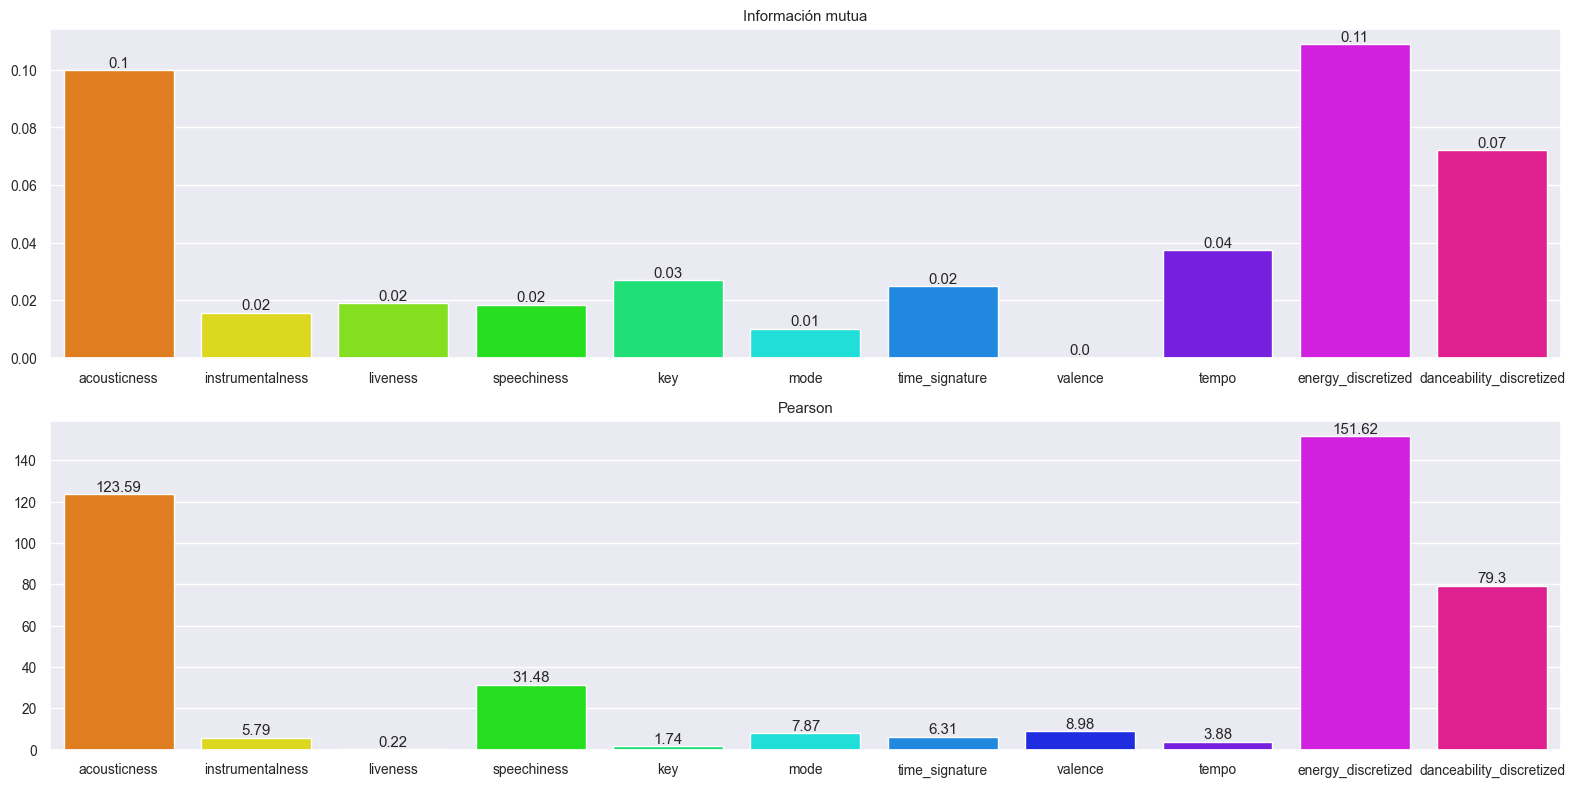

array([123.58597235,   5.79468286,   0.22315985,  31.48476226,
         1.74312095,   7.87021719,   6.31448685,   8.97840548,
         3.87647997, 151.61616827,  79.30370705])

In [ ]:
#from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.feature_selection import SelectKBest

def select_features_mutual_info(X_train, y_train, X_test,k= 'all'):  
  #fs = SelectKBest(score_func=mutual_info_regression, k=k )  
  fs = SelectKBest(score_func=mutual_info_classif, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)  
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
def select_features_pearson(X_train, y_train, X_test,k= 'all'):  
  #fs = SelectKBest(score_func=f_regression, k=k )  
  fs = SelectKBest(score_func=f_classif, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)  
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

X_train_mi, X_test_mi, mi = select_features_mutual_info(X_train_red, y_train, X_test_red)
X_train_pc, X_test_pc, pc = select_features_pearson(X_train_red, y_train, X_test_red)

# Función para agregar valores de score sobre cada barra
def add_scores_on_bars(ax, scores):
    for bar, score in zip(ax.patches, scores):
        ax.text(bar.get_x() + bar.get_width() / 2, 
                bar.get_height(), 
                round(score, 2), 
                ha='center', 
                va='bottom')

# Colores únicos para cada barra
palette = sns.color_palette("hsv", len(df_train.columns[:-1]))
features = [c for c in df_train.columns[:-1]]

fig,axes = plt.subplots(2,1,figsize=(16,8))
axes[0].set_title('Información mutua')
#sns.barplot( x = [c for c in df_train.columns[:-1] ], y = mi.scores_,ax=axes[0])
sns.barplot(x=features, y=mi.scores_, hue=features, ax=axes[0], palette=palette, dodge=False, legend=False)
add_scores_on_bars(axes[0], mi.scores_)

axes[1].set_title('Pearson')
#sns.barplot( x = [c for c in df_train.columns[:-1] ], y = pc.scores_,ax=axes[1]); #Grafico el F score de cada feature
sns.barplot(x=features, y=pc.scores_, hue=features, ax=axes[1], palette=palette, dodge=False, legend=False)
add_scores_on_bars(axes[1], pc.scores_)

plt.tight_layout()
plt.show()

pc.scores_

Luego de la ejecución de este código podemos seleccionar las fetures más importantes:

- acousticness
- energy_discretized
- danceability_discretized
- tempo 
- time_signature


### Entrenamiento del modelo

In [ ]:
df_copia_2.head()

,acousticness,instrumentalness,liveness,speechiness,key,mode,time_signature,valence,tempo,energy_discretized,danceability_discretized,label
0,1,1,0,0,8,0,4,0,3,3.0,3.0,1
1,0,0,0,0,4,1,4,1,3,4.0,7.0,1
2,0,0,0,0,5,1,4,0,3,2.0,5.0,1
3,1,0,0,0,5,1,4,1,3,1.0,8.0,1
4,1,0,0,0,6,0,4,0,2,2.0,2.0,1


In [ ]:
# selecciono las columnas que tienen mayor correlación con la variable objetivo
X = df_copia_2.loc[:,['acousticness', 'energy_discretized', 'danceability_discretized', 'tempo', 'time_signature']].values # da un score de 
#X = df_copia_2.drop(columns=['label']).values # cuando seleccionamos todas da un score de Mejor score:  0.7878214733891393
y = df_copia_2.loc[:,TARGET].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Escalamiento de los datos
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Modelo Random Forest

Hacemos una búsqueda aleatoria de los mejores hiperparametros.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Definir el espacio de parámetros para RandomizedSearchCV
param_dist = {
    'max_depth': [3, 5, 10, None] + list(np.arange(1, 30)),
    'n_estimators': [10, 50, 100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear el clasificador base
clf = RandomForestClassifier(random_state=42, n_jobs=10)

# Crear un scorer personalizado
macro_f1_scorer = make_scorer(f1_score, average='macro')

# Instanciar RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, scoring=macro_f1_scorer, cv=10, verbose=1, random_state=42, n_jobs=-1)

# Ajustar RandomizedSearchCV
random_search.fit(X_train, y_train)

# Los mejores parámetros encontrados
print("Mejores parámetros: ", random_search.best_params_)

# Mejor score encontrado
print("Mejor score: ", random_search.best_score_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


Mejores parámetros:  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}
Mejor score:  0.7609049330074728


In [ ]:
results_df = pd.DataFrame(random_search.cv_results_)

results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023395,0.005417,0.016553,0.000923,10,10,1,20,entropy,False,...,0.723958,0.728006,0.842424,0.760369,0.720430,0.724242,0.675000,0.741887,0.041601,56
1,0.083637,0.005151,0.018048,0.002801,50,2,4,8,gini,True,...,0.763393,0.701689,0.861228,0.742280,0.706215,0.763636,0.708847,0.749319,0.045517,25
2,0.134768,0.009543,0.040982,0.014997,100,2,4,17,entropy,False,...,0.712848,0.766862,0.883058,0.760369,0.688156,0.763636,0.680492,0.745664,0.058478,42
3,0.378612,0.019971,0.058191,0.007751,300,2,1,12,gini,False,...,0.723958,0.692754,0.862900,0.738289,0.662981,0.745386,0.692308,0.736392,0.053558,80
4,0.740153,0.025628,0.073737,0.006689,500,2,4,None,entropy,True,...,0.718939,0.678788,0.880184,0.742280,0.727136,0.763636,0.720430,0.751611,0.056931,11


>       Mejores parámetros:

- Mejores parámetros:  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}

- Mejor score:  0.7609049330074728

In [ ]:
# Ordeno los resultados por rank_test_score
results_df.sort_values(by='rank_test_score', inplace=True)


In [ ]:
# Accedo a la primera fila del dataframe
results_df.iloc[0]

mean_fit_time                                                       0.440454
std_fit_time                                                        0.022595
mean_score_time                                                     0.060772
std_score_time                                                      0.012181
param_n_estimators                                                       400
param_min_samples_split                                                    2
param_min_samples_leaf                                                     2
param_max_depth                                                            5
param_criterion                                                      entropy
param_bootstrap                                                        False
params                     {'n_estimators': 400, 'min_samples_split': 2, ...
split0_test_score                                                   0.736318
split1_test_score                                                   0.811254

Voy a graficar el rendimiento de Random Forest de acuerdo al parametro nro de estimadores.

In [ ]:
results_df.columns

resultados = results_df.copy()

0.7609049330074728


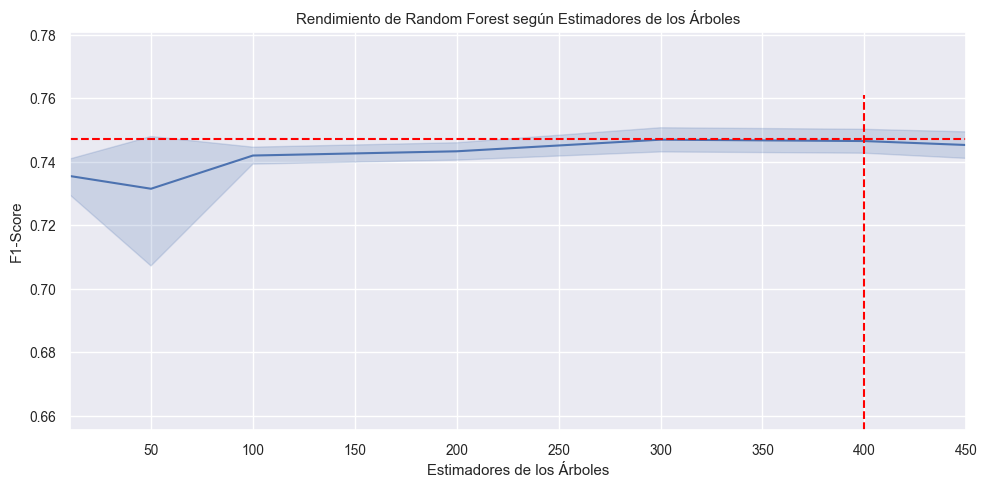

In [ ]:
# Convertir los resultados de RandomizedSearchCV en un DataFrame
#results_df = pd.DataFrame(random_search.cv_results_)

# Filtrar las columnas necesarias
# 'mean_test_score' contiene los scores medios de las pruebas de validación cruzada
# 'param_max_depth' contiene los valores de 'max_depth' utilizados en cada iteración
#results_df = results_df[['param_n_estimators', 'mean_test_score']]
resultados = resultados[['param_n_estimators', 'mean_test_score']]

# Renombrar columnas para facilitar el gráfico
resultados.rename(columns={'param_n_estimators': 'Estimadores', 'mean_test_score': 'F1-Score'}, inplace=True)

# selecciono la columna mean_test_score del mejor resultado
mejor = resultados.iloc[0]['F1-Score']
print(mejor)

# Crear el gráfico
f, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(data=resultados, x='Estimadores', y='F1-Score', ax=ax)

# Líneas de referencia (ajustar según sea necesario)
ax.plot([400, 400], [resultados['F1-Score'].min(), resultados['F1-Score'].max()], color="red", linestyle="--")
#ax.plot([resultados['Estimadores'].min(), resultados['Estimadores'].max()], [0.756, 0.756], color="red", linestyle="--")
#ax.plot([resultados['Estimadores'].min(), resultados['Estimadores'].max()], [round(mejor,3), round(mejor,3)], color="red", linestyle="--")
ax.plot([resultados['Estimadores'].min(), resultados['Estimadores'].max()], [0.747, 0.747], color="red", linestyle="--")

ax.set_xlim([resultados['Estimadores'].min(), resultados['Estimadores'].max()-50])
ax.set_ylim([resultados['F1-Score'].min(), resultados['F1-Score'].max()+0.02])

plt.title("Rendimiento de Random Forest según Estimadores de los Árboles")
ax.set_xlabel("Estimadores de los Árboles")
ax.set_ylabel("F1-Score")
plt.tight_layout()
plt.show()


- Cambie por nro de estimadores

No me gusta mucho como da la gráfica. No logro ajustarla a la escala de los ejes.

### Ejecutamos con los mejores parametros:

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}

In [ ]:
# Mejores hiperparámetros encontrados
best_params = {
    'n_estimators': 400,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_depth': 5,
    'criterion': 'entropy',
    'bootstrap': False
}

In [ ]:
# Crear el modelo RandomForestClassifier con los mejores hiperparámetros
rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)

In [ ]:
# Entrenar el modelo usando el conjunto de entranamiento
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       min_samples_leaf=2, n_estimators=400, n_jobs=-1,
                       random_state=42)

- Grafiquemos la curva ROC para cada una de las clases 

In [ ]:
y_pred = rf.predict_proba(X_test)

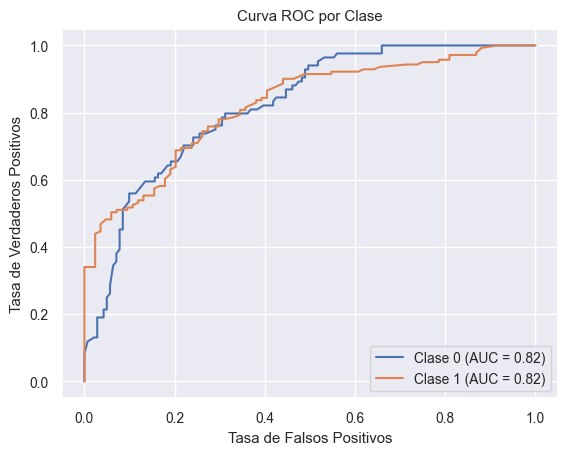

In [ ]:
from sklearn.metrics import roc_curve, auc

#Vamos a graficar la curva ROC para todas las clases en una figura y AUC para cada clase a la vez
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred.shape[1]  # Número de clases

# Calcular FPR, TPR y AUC para cada clase
for i in range(n_classes):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para todas las clases en una figura
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:0.2f})')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc="lower right")
plt.show()